<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amingolnari/Demo-BTCUSD-PricePred-ProbabilisticDL-TransferLearning/blob/main/Demo_BTCUSD_PricePred_5min_TensorFlowProb.ipynb) -->

# [**Transfer Learning meets NLP for Cryptocurrency Price Prediction**]

**Authors:**

(a) **Jinhyeok Park**



**This demo showcases the prediction of cryptocurrency prices using probabilistic deep learning models. This code dis based on Probabilistic Deep Learning and Transfer Learning for Robust Cryptocurrency Price Prediction paper. we add and change some code using white paper of cyrptocurrency**

**Models Utilized:**
- *Bidirectional Probabilistic GRU (bi_gru_prob)*
- *Bidirectional Simple GRU (bi_gru_simple)*
- *Bidirectional GRU with Time-Distributed Dense (bi_gru_time_dist)*
- *Probabilistic GRU (gru_prob)*
- *Simple GRU (gru_simple)*
- *GRU with Time-Distributed Dense (gru_time_dist)*
- *Bidirectional Probabilistic LSTM (bi_lstm_prob)*
- *Bidirectional Simple LSTM (bi_lstm_simple)*
- *Bidirectional LSTM with Time-Distributed Dense (bi_lstm_time_dist)*
- *Probabilistic LSTM (lstm_prob)*
- *Simple LSTM (lstm_simple)*
- *LSTM with Time-Distributed Dense (lstm_time_dist)*



**Workflow Overview:**
1. **Data Preprocessing:**
   - *Download cryptocurrency price data, e.g., Bitcoin (BTC), using Yahoo Finance.*
   - *Normalize and split the data into training and testing sets.*

2. **Model Training:**
   - *Train various deep learning models (include probabilistic model) with different architectures on BTC price data.*
   - *Models include both GRU and LSTM variants.*

3. **Transfer Learning:**
   - *Utilize the best-performing model (e.g., gru_prob) as a pre-trained model.*
   - *Transfer this model to predict prices for other cryptocurrencies.*

4. **Evaluation and Analysis:**
   - *Evaluate model performance using metrics such as R2 score, Mean Absolute Percentage Error, and more.*
   - *Generate Residuals vs. Predicted Values plots for each model.*

5. **Reporting and Visualization:**
   - *Report and visualize the results, including prediction plots for different models.*
   - *Provide insights into model performance and potential use in predicting other cryptocurrency prices.*

**Note:** Ensure proper installation of required libraries, including TensorFlow Probability and yfinance.


# Financial Time Series Analysis Setup. Import Necessary Libraries and Set Up the Environment for Financial Time Series Analysis.

In [4]:
"""
Libraries:
- os: Operating system interaction.
- numpy: Numerical operations.
- pytz: Time zone support.
- pandas: Data manipulation and analysis.
- glob: Unix-style pathname pattern expansion.
- matplotlib.pyplot: Plotting library.
- matplotlib.dates: Date plotting functionality.
- datetime: Date and time manipulation.
- time: Time-related functions.
- warnings: Warning control.
- sklearn.metrics: Metrics for model evaluation.
- tensorflow and keras: Deep learning frameworks.
- tensorflow_probability: Library for probabilistic modeling.

Note: Adjustments such as turning off TensorFlow warnings and installing required packages are included.
"""

import os
import numpy as np
import pytz
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime, timedelta
import time
import warnings
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_poisson_deviance as mpd
from sklearn.metrics import PredictionErrorDisplay
import tensorflow as tf
import keras.backend as K
from keras.layers import Input, LSTM, Dense, BatchNormalization, Dropout
from keras.layers import Activation, TimeDistributed, Flatten, GRU, Bidirectional
from keras.models import Model, model_from_json, load_model
from keras.callbacks import Callback
from tensorflow_probability.python.layers import DistributionLambda
from tensorflow_probability.python.distributions import Normal

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
%matplotlib inline

# install Yahoo finance

In [5]:
%pip install yfinance


  Using cached yfinance-0.2.41-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.2.2-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached frozendict-2.4.4-cp39-cp39-win_amd64.whl.metadata (23 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached yfinance-0.2.41-py2.py3-none-any.whl (73 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached frozendict-2.4.4-cp39-cp39-win_amd64.whl (37 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached lxml-5.2.2-cp39-cp39-win_amd64.whl (3.8 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached soupsieve-2.5-py3-none-any.whl (

In [6]:
import yfinance as yf

# Matplotlib Plotting Configuration

In [7]:
"""
Description:
- Configure Matplotlib plotting settings for consistent and visually appealing financial time series plots.

Settings:
- Figure size: Adjust the default size for figures.
- Font size: Set the font size for text in plots.
- Axes title size: Define the title font size for axes.
- Axes label size: Specify the font size for axes labels.
- X-axis tick label size: Set the font size for tick labels on the x-axis.
- Y-axis tick label size: Set the font size for tick labels on the y-axis.
- Legend font size: Adjust the font size for legends.

Usage:
- Apply these settings at the beginning of financial time series analysis scripts to enhance plot readability.
"""
plt.rcParams.update({'figure.figsize': [18, 6],
                     'font.size':       16,
                     'axes.titlesize':  16,
                     'axes.labelsize':  16,
                     'xtick.labelsize': 16,
                     'ytick.labelsize': 16,
                     'legend.fontsize': 16})

# Download Price Data from Yahoo Finance
dowload last 60 days data in interval 5-min <br>
but in our experiments we use upbit-data for 2year 1 hour

In [11]:
def download_price_data(timezone = None, date_format = '%Y-%m-%d %H:%M', tickers = 'BTC-USD'):
    """
    Description:
    - Fetch historical price data for specified tickers from Yahoo Finance.
    - Adjusts the data for a specific timezone and custom date format.

    Parameters:
    - timezone (str): Target timezone for data conversion.
    - date_format (str): Custom date format for the 'Datetime' column.
    - tickers (str or list): Ticker symbols of financial instruments to download.

    Returns:
    - pd.DataFrame: Historical price data with adjusted datetime and 'AdjClose' column.

    Note:
    - Ensure 'yfinance' library is installed using '%pip install yfinance'.
    """
    d = yf.download(tickers = tickers,
                    start = datetime.now() - timedelta(days = 60) + timedelta(minutes = 5),
                    end = datetime.now(), interval = '5m')
    d = (d.tz_convert(timezone)).rename(columns = {'Adj Close': 'AdjClose'}).copy(deep = True)
    d['Datetime'] = pd.date_range(start = datetime.strftime(d.index[0], date_format), periods = len(d), freq = '5min')
    d['Datetime'] = d['Datetime'].dt.strftime(date_format)
    d.set_index('Datetime', inplace = True)
    print(f'Downloaded from {d.index[0]} to {d.index[-1]} with total {len(d.index)} samples')
    return d

# Set Timezone and Date Format

In [12]:
"""
Description:
- Defines the timezone for Iran and a custom date format.

Variables:
- korea_timezone (pytz.timezone): Represents the timezone for Republic of Korea.
- dateformat (str): Custom date format to be used in datetime manipulations.
"""
korea_timezone = pytz.timezone(zone = 'Asia/Seoul')
dateformat = '%Y-%m-%d %H:%M'

"""
Description:
- Downloads historical price data for a specified cryptocurrency (default is BTC-USD).
- The data is fetched within the last 60 days with a 5-minute interval.

Parameters:
- timezone (pytz.timezone): Timezone to convert the data timestamps.
- date_format (str): Custom date format for timestamp display.
- tickers (str): Cryptocurrency ticker symbol. (default is BTC-USD)

Returns:
- pd.DataFrame: Historical price data with adjusted close values and timestamps.
"""


# data = download_price_data(timezone = korea_timezone, date_format = dateformat)

'\nDescription:\n- Downloads historical price data for a specified cryptocurrency (default is BTC-USD).\n- The data is fetched within the last 60 days with a 5-minute interval.\n\nParameters:\n- timezone (pytz.timezone): Timezone to convert the data timestamps.\n- date_format (str): Custom date format for timestamp display.\n- tickers (str): Cryptocurrency ticker symbol. (default is BTC-USD)\n\nReturns:\n- pd.DataFrame: Historical price data with adjusted close values and timestamps.\n'

# Get Downloaded Data of price of cypto

In [16]:
price_data = pd.read_csv('../data/upbit_2years_hourly_data.csv')


In [17]:
price_data.head()

market candle_date_time_kst  opening_price  high_price  low_price  \
0    ONT  2024-05-29T08:00:00          429.1       430.9      428.0   
1    ONT  2024-05-29T07:00:00          431.4       431.5      429.4   
2    ONT  2024-05-29T06:00:00          431.3       433.0      430.4   
3    ONT  2024-05-29T05:00:00          433.3       433.7      431.4   
4    ONT  2024-05-29T04:00:00          429.4       433.4      428.7   

   trade_price      timestamp  candle_acc_trade_price  candle_acc_trade_volume  
0        429.9  1716940797363            5.486395e+07            127820.222686  
1        429.4  1716937151068            3.157835e+07             73356.602316  
2        431.2  1716933573856            2.647460e+07             61293.638047  
3        431.4  1716929923280            2.289108e+07             52890.772610  
4        433.1  1716926380519            4.381985e+07            101605.923116

In [19]:
price_data['market'].unique()

array(['ONT', '1INCH', 'CVC', 'AVAX', 'BTC', 'SNT', 'MTL', 'XEM', 'SAND',
       'ZIL', 'SBD', 'HIVE', 'KAVA', 'STPT', 'NEO', 'HBAR', 'POWR', 'BTT',
       'SHIB', 'DOGE', 'ICX', 'MVL', 'KNC', 'IOST', 'TFUEL', 'ETH', 'JST',
       'HUNT', 'MED', 'AERGO', 'AKT', 'MATIC', 'PUNDIX', 'MOC', 'EOS',
       'BORA', 'XLM', 'DOT', 'LINK', 'STEEM', 'SOL', 'GLM', 'CHZ', 'FLOW',
       'SXP', 'MANA', 'ARK', 'ZRX', 'STX', 'GMT', 'VET', 'XRP', 'QTUM',
       'DKA', 'QKC', 'ORBS', 'THETA', 'AAVE', 'TRX', 'GRS', 'STORJ',
       'EGLD', 'ARDR', 'TON', 'ATOM', 'CTC', 'ADA', 'WAVES', 'MBL', 'XTZ',
       'SC', 'ELF', 'ANKR', 'BAT', 'CRO', 'TT', 'MLK'], dtype=object)

# Plot Downloaded BTC Price Data

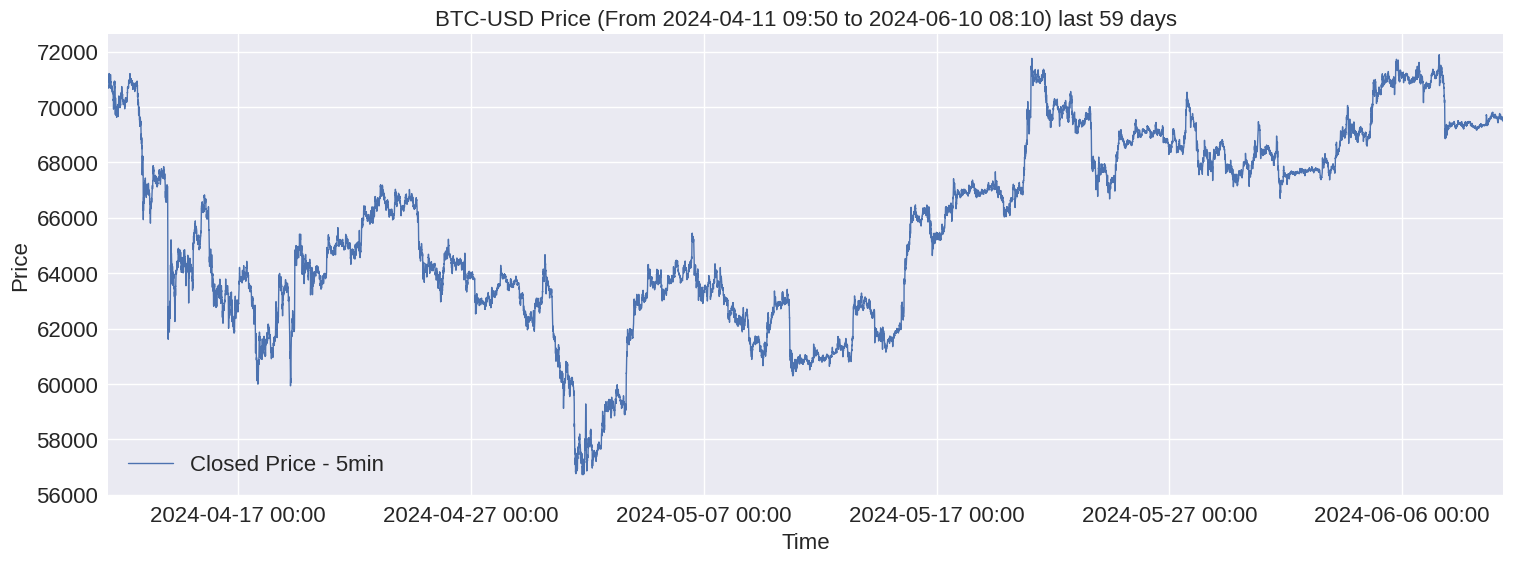

In [ ]:
"""
Description:
- Plots the historical closed price of a cryptocurrency.
- The x-axis is formatted with a custom date formatter.

Parameters:
- data (pd.DataFrame): Historical price data with timestamps and closed prices.
- dateformat (str): Custom date format for timestamp display.
"""
dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in price_data.candle_date_time_kst]

plt.gca().xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
plt.plot(dates, list(price_data['Close']), label = 'Closed Price - 5min', linewidth = 1)
plt.xlim([dates[0], dates[-1]])
plt.title('BTC-USD Price (From {} to {}) last {} days'
.format(price_data.index[0], price_data.index[-1], (datetime.strptime(price_data.index[-1], dateformat) - datetime.strptime(price_data.index[0], dateformat)).days))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Cluster CriptoCurenccy using Whitepaper data

All the white paper data is from https://whitepaper.io

# Methods For Normalize And Denormalize Data

In [ ]:
def normalize(x_, minmax):
    """
    Description:
    - Normalizes input data within the specified min-max range.

    Parameters:
    - x_ (np.ndarray): Input data to be normalized.
    - minmax (np.ndarray): Array containing the minimum and maximum values.

    Returns:
    - np.ndarray: Normalized data.
    """
    return (x_ - minmax[0]) / (minmax[1] - minmax[0])

def denormalize(x_, minmax):
    """
    Description:
    - Denormalizes input data based on the specified min-max range.

    Parameters:
    - x_ (np.ndarray): Input data to be denormalized.
    - minmax (np.ndarray): Array containing the minimum and maximum values used.

    Returns:
    - np.ndarray: Denormalized data.
    """
    return minmax[0] + ((minmax[1] - minmax[0]) * x_)

# Bidirectional Probabilistic GRU

In [ ]:
def bi_gru_prob(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Probabilistic Gated Recurrent Unit (GRU) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Probabilistic GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Bidirectional Simple GRU Model with Regularization and Batch Normalization

In [ ]:
def bi_gru_simple(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Simple Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Simple GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Bidirectional Time Distributed GRU Model with Regularization and Batch Normalization

In [ ]:
def bi_gru_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Time Distributed Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Time Distributed GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True))(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Probabilistic GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_prob(shape = None, name = None):
    """
    Description:
    - Construct a Probabilistic Gated Recurrent Unit (GRU) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Probabilistic GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Simple GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_simple(shape = None, name = None):
    """
    Description:
    - Construct a Simple Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Simple GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Time Distributed GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Time Distributed Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Time Distributed GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True)(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Bidirectional Probabilistic LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_prob(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Probabilistic Long Short-Term Memory (LSTM) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Probabilistic LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Bidirectional Simple LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_simple(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Simple Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Simple LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Bidirectional Time Distributed LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Time Distributed Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Time Distributed LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True))(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Probabilistic LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_prob(shape = None, name = None):
    """
    Description:
    - Construct a Probabilistic Long Short-Term Memory (LSTM) model with regularization, batch normalization, and distribution output.
    The distribution is defined as a Normal distribution with the predicted values (loc) and a scale parameter derived from a softplus
    function applied to the predicted values. This approach is employed for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Probabilistic LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Simple LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_simple(shape = None, name = None):
    """
    Description:
    - Construct a simple Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Simple LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Time Distributed LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Time Distributed Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Time Distributed LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True)(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Method for Retrieving the Index of a Specific Layer.

In [ ]:
def get_layer_index(model_layers, layer_name):
    for idx, layer in enumerate(model_layers):
        if layer.name == layer_name:
            return idx

# Define a Custom Callback to Monitor and Track the R2-Score on the Validation Dataset.

In [ ]:
class TrainingCallback(Callback):
    """
    Description:
    - [TrainingCallback] Custom Callback for Monitoring and Managing Training Process
    This callback monitors the training process, tracks the R2 score, and saves the best model based on R2 improvement on validation dataset.

    Parameters:
    - check_best (bool): Whether to check and save the best model based on the highest R2 score.
    - change_lr (bool): Whether to change the learning rate during training.
    - change_lr_freq (int): Frequency of learning rate changes.
    - model_dir (str): Directory to save the best model and training history.
    - model_name (str): Name of the best model file.
    - valid_data (tuple): Validation data in the form of (valid_X, valid_y).
    - model (tf.keras.Model): The main model being trained.

    Methods:
    - on_train_begin: Called at the start of training.
    - on_train_end: Called at the end of training.
    - on_epoch_begin: Called at the beginning of each epoch.
    - on_epoch_end: Called at the end of each epoch.

    The callback saves the best model based on R2 score and logs the training progress in a text file.
    """
    def __init__(self,
                 check_best = True,
                 model_dir = None,
                 model_name = 'best_r2_model',
                 valid_data = None,
                 model = None):
        super(TrainingCallback).__init__()
        if valid_data is None: raise ValueError('You have to define validation data: e.g. valid_data = (valid_X, valid_y)!')
        if model is None: raise ValueError('You have to define model: e.g. model = your_model_name!')
        self.check_best = check_best
        self.price_r2, self.valid_X, self.valid_y = 0.0, valid_data[0], valid_data[1]
        if model_dir is None:
            self.best_model_dir = os.path.join(os.getcwd(), 'best_model').replace('\\', '/')
        else:
            self.best_model_dir = model_dir
        if not os.path.isdir(self.best_model_dir): os.makedirs(self.best_model_dir)
        self.best_model_name = model_name
        self.save_best = False
        self.model = model
        self.model_ = None
        self.time = 0
        self.text_file = None

    def on_train_begin(self, logs = None, **kwargs):
        self.text_file = open(f'{self.best_model_dir}_history.txt', 'w')
        if self.check_best:
            self.model.save(f'{self.best_model_dir}/{self.best_model_name}.keras')
            self.model_ = load_model(f'{self.best_model_dir}/{self.best_model_name}.keras', safe_mode = False)
        c = {True: 'On', False: 'Off'}
        text = f'Training started. Checking the best model based on the highest R2-score is {c[self.check_best]}'
        self.text_file.writelines(text + '\n')
        print(text)

    def on_train_end(self, logs = None, **kwargs):
        self.text_file.close()

    def on_epoch_begin(self, epoch, logs = None, **kwargs):
        self.time = time.time()

    def on_epoch_end(self, epoch, logs = None, **kwargs):
        if self.check_best:
            price_check = 'Model Weights Not Changed'
            self.save_best = False
            pred_ = self.model.predict(self.valid_X)
            if np.array(pred_.shape).shape[0] > 1:
                price_r2_ = r2_score(self.valid_y.flatten(), np.mean(pred_, axis = 1))
            else:
                price_r2_ = r2_score(self.valid_y, pred_)
            if price_r2_ > self.price_r2:
                self.model_ = load_model(f'{self.best_model_dir}/{self.best_model_name}.keras', safe_mode = False)
                price_check = 'Model Weights Changed'
                self.price_r2, self.save_best = price_r2_, True
                for layer in self.model.layers:
                    if layer.weights:
                        layer_idx = get_layer_index(self.model_.layers, layer.name)
                        self.model_.layers[layer_idx].set_weights(self.model.layers[layer_idx].get_weights())
            if self.params['epochs'] > 9:
                e = str(int((10 * self.params['epochs']) + epoch + 1))[1:]
            else:
                e = epoch + 1
            t = str(timedelta(seconds = int(time.time() - self.time)))
            if self.save_best:
                self.model_.save(f'{self.best_model_dir}/{self.best_model_name}.keras')
                if 'val_loss' in logs.keys():
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f}, val_loss: {:.4f} | {} And Best Model Saved'.format(e,
                                                                                                                                          self.params['epochs'],
                                                                                                                                          t,
                                                                                                                                          price_r2_,
                                                                                                                                          logs['loss'],
                                                                                                                                          logs['val_loss'],
                                                                                                                                          price_check)
                else:
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f} | {} And Best Model Saved'.format(e,
                                                                                                                        self.params['epochs'],
                                                                                                                        t, price_r2_,
                                                                                                                        logs['loss'],
                                                                                                                        price_check)
            else:
                if 'val_loss' in logs.keys():
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f}, val_loss: {:.4f} | {}'.format(e,
                                                                                                                     self.params['epochs'],
                                                                                                                     t,
                                                                                                                     price_r2_,
                                                                                                                     logs['loss'],
                                                                                                                     logs['val_loss'],
                                                                                                                     price_check)
                else:
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f} | {}'.format(e,
                                                                                                   self.params['epochs'],
                                                                                                   t,
                                                                                                   price_r2_,
                                                                                                   logs['loss'],
                                                                                                   price_check)
            self.text_file.writelines(text + '\n')
            print(text)

# Transfer Model for Probabilistic Prediction with Fine-Tuning (trained model on BTC price data)

In [ ]:
def transfer_model(transfer_model_path = None, transfer_model_name = None, name = 'best_TRXPred_gru_prob'):
    """
    Description:
    - Load a pre-trained model, freeze layers, and create a new model for transfer learning with fine-tuning.

    Parameters:
    - transfer_model_path (str): Path to the directory containing the pre-trained model.
    - transfer_model_name (str): Name of the pre-trained model file.
    - name (str): Name for the new transfer model.

    Returns:
    - tf.keras.Model: Compiled transfer model with fine-tuning for probabilistic prediction.
    """
    # Default values for transfer model path and name
    if transfer_model_path is None:
        transfer_model_path = 'best_BTCPred_gru_prob'
    if transfer_model_name is None:
        transfer_model_name = 'best_BTCPred_gru_prob'

    # Load the pre-trained model
    m = load_model(f'{transfer_model_path}/{transfer_model_name}.keras', safe_mode = False)

    # Freeze layers except the last one
    for layer in m.layers[:-3]:
        layer.trainable = False

    # Set a new name for the transfer model
    m._name = name

    # Compile the transfer model with a specified optimizer and loss function (NLL)
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Data Splitting for Time Series Prediction

In [ ]:
def split_data(close_price = None, training_len = None, testing_len = None, analyzing_duration = None):
    """
    Description:
    - Split time series data into training and testing sets for sequence prediction.

    Parameters:
    - close_price (numpy.ndarray): Time series data of closing prices.
    - training_len (int): Length of the training set.
    - testing_len (int): Length of the testing set.
    - analyzing_duration (int): Duration of the sequence used for prediction.

    Returns:
    - tuple: Tuple containing training and testing sets (train_X, train_y, test_X, test_y).
      - train_X (numpy.ndarray): Training input sequences.
      - train_y (numpy.ndarray): Training output values.
      - test_X (numpy.ndarray): Testing input sequences.
      - test_y (numpy.ndarray): Testing output values.
    """
    # Initialize lists to store training and testing data
    train_X, train_y = [], []
    test_X, test_y = [], []

    # Generate training sequences and corresponding output values
    for idx in range(training_len - analyzing_duration):
        train_X.append(close_price[idx:analyzing_duration + idx].reshape(analyzing_duration))
        train_y.append(close_price[idx + analyzing_duration])

    # Reshape training data into the required format
    train_X, train_y = np.asarray(train_X).reshape((len(train_X), analyzing_duration, 1)), np.asarray(train_y)

    # Generate testing sequences and corresponding output values
    for idx in range(training_len - analyzing_duration, training_len + testing_len - analyzing_duration):
        test_X.append(close_price[idx:analyzing_duration + idx].reshape(analyzing_duration))
        test_y.append(close_price[idx + analyzing_duration])

    # Reshape testing data into the required format
    test_X, test_y = np.asarray(test_X).reshape((len(test_X), analyzing_duration, 1)), np.asarray(test_y)
    return train_X, train_y, test_X, test_y

# Plotting Time Series Prediction Results

In [ ]:
def plot_prediction(y_train, y_test, y_pred, model_name = None):
    """
    Description:
    - Generate a plot to visualize the results of time series prediction.

    Parameters:
    - y_train (numpy.ndarray): True values of the training set.
    - y_test (numpy.ndarray): True values of the testing set.
    - y_pred (numpy.ndarray): Predicted values, including mean and optional confidence interval.
    - model_name (str): Name of the model for plot title.

    Returns:
    - None: Displays the generated plot.
    """
    # Set up plot parameters
    plt.rcParams.update({'figure.figsize': [18, 6]})

    dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index[-len(y_test):]]

    fig, ax = plt.subplots(1)

    ax.xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
    ax.plot(dates, denormalize(y_test, close_minmax), label = 'Test', color = 'k', linewidth = 1)
    ax.plot(dates, denormalize(y_pred.mean(axis = 1), close_minmax), label = 'Prediction', color = 'r', linewidth = 1)
    if y_pred.shape[1] > 1:
        ax.fill_between(dates, denormalize(y_pred.mean(axis = 1) + .5 * y_pred.std(axis = 1), close_minmax),
                        denormalize(y_pred.mean(axis = 1) - .5 * y_pred.std(axis = 1), close_minmax),
                        alpha = .25, label = 'Prediction Bounds', color = 'c')
    ax.set_xlim([dates[0], dates[-1]])
    ax.set_title(f'Best Model: {model_name}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    ax.tick_params(axis = 'x', rotation = 15)
    ax.legend()
    plt.show()

# Base Models Dictionary

In [ ]:
"""
Description:
- Dictionary containing base model names as keys and corresponding model functions as values.
These models are used as building blocks for constructing more complex models and architectures in the workflow.
"""
base_models_list = {
    'bi_gru_prob':          bi_gru_prob,
    'bi_gru_simple':        bi_gru_simple,
    'bi_gru_time_dist':     bi_gru_time_dist,
    'gru_prob':             gru_prob,
    'gru_simple':           gru_simple,
    'gru_time_dist':        gru_time_dist,
    'bi_lstm_prob':         bi_lstm_prob,
    'bi_lstm_simple':       bi_lstm_simple,
    'bi_lstm_time_dist':    bi_lstm_time_dist,
    'lstm_prob':            lstm_prob,
    'lstm_simple':          lstm_simple,
    'lstm_time_dist':       lstm_time_dist
}

# Model Training Configuration

In [ ]:
"""
Description:
- Configuration settings for training the time series prediction models.

Parameters:
- test_split_percentage (float): Percentage of data reserved for testing.
- validation_split_percentage (float): Percentage of training data used for validation.
- epochs (int): Number of training epochs.
- batch_size (int): Batch size for training.
- verbose (int): Verbosity level during training (0 for silent).
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
test_split_percentage = .8
validation_split_percentage = .2
epochs = 20
batch_size = 32
verbose = 0
analysis_duration = 6
price_pairs = 'BTCUSD'

# Price Preprocessing and Normalization Parameters

In [ ]:
"""
Parameters for normalizing cryptocurrency closing prices:
- alpha (float): Scaling factor for the minimum value.
- beta (float): Scaling factor for the maximum value.
- close_price (numpy.ndarray): NumPy array containing closing prices.
- data_len (int): Total length of the price data.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
"""
alpha, beta = .8, 1.2
close_price = pd.Series.to_numpy(data['Close'])
data_len = close_price.shape[0]
train_len = int((test_split_percentage * data_len) // analysis_duration * analysis_duration)
test_len = int(data_len - train_len)
close_minmax = np.array([alpha * close_price.min(), beta * close_price.max()], dtype = 'float32')

# Price Normalization and Save

In [ ]:
"""
Description:
- Normalize the closing prices of cryptocurrency data and save the min-max normalization range.

Parameters:
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- data_len (int): Total length of the price data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
close_price = close_price.reshape((data_len, 1)).astype('float32')
close_price = normalize(close_price, close_minmax)
np.save(f'close_minmax_{price_pairs.lower()}.npy', close_minmax)

# Data Splitting for Training and Validation

In [ ]:
"""
Description:
- Split the time series data into training, testing, and validation sets for model training.

Parameters:
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and testing data split.
- X_val, y_val (numpy.ndarray): Validation data split from the training set.
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- validation_split_percentage (float): Percentage of training data used for validation.
- analyzing_duration (int): Duration of the sequence used for prediction.
"""
X_train, y_train, X_test, y_test = split_data(close_price = close_price,
                                              training_len = train_len,
                                              testing_len = test_len,
                                              analyzing_duration = analysis_duration)
X_val, y_val = X_train[int(train_len - (validation_split_percentage * train_len)):], y_train[int(train_len - (validation_split_percentage * train_len)):]
X_train, y_train = X_train[:int(train_len - (validation_split_percentage * train_len))], y_train[:int(train_len - (validation_split_percentage * train_len))]

# Train Multiple Base Models, Evaluate Their Performance on the Test Set, and Store the Results.

In [ ]:
"""
Parameters:
- base_models_list (dict): Dictionary containing base model functions.
- X_train, y_train (numpy.ndarray): Training data and labels.
- X_test, y_test (numpy.ndarray): Testing data and labels.
- X_val, y_val (numpy.ndarray): Validation data and labels.
- close_minmax (numpy.ndarray): Min-max values for denormalization.
- epochs (int): Number of training epochs.
- batch_size (int): Size of each training batch.
- verbose (int): Verbosity mode for training output.
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): String identifier for the price pair.

Returns:
- y_pred_best (dict): Predictions from the best models.
- models_test_result (dict): Evaluation metrics for each trained model on the test set.
"""

y_pred_best, models_test_result = {}, {}

for selected_model in list(base_models_list.items()):
    m_name_ = f'best_{price_pairs[:3]}Pred_{selected_model[0]}'
    models_test_result.update({f'{m_name_}': {}})
    if os.path.isfile(f'{m_name_[:-2]}_history.npy'):
        continue
    out_path = m_name_.replace('best_', '')
    if not os.path.isdir(out_path): os.makedirs(out_path)
    out_path_best = m_name_

    K.clear_session()
    model = selected_model[1](**{'shape': X_train.shape[1:], 'name': price_pairs.lower()})
    model.summary(line_length = 140)

    tbcall = TrainingCallback(model_dir = out_path_best,
                              valid_data = (X_val, y_val),
                              model = model, model_name = m_name_)

    model_history = model.fit(X_train, y_train,
                              epochs = epochs, batch_size = batch_size, callbacks = tbcall, verbose = verbose)

    model.save(f'{out_path}/{m_name_.replace("best", "fulltrained")}.keras')
    best_model = load_model(f'{out_path_best}/{m_name_}.keras', safe_mode = False)

    test_p = model.predict(X_test)
    test_p_best = best_model.predict(X_test)
    y_pred_best.update({f'{m_name_}': test_p_best})

    models_test_result[f'{m_name_}'].update({'r2_score': float(r2_score(denormalize(y_test, close_minmax),
                                                                        denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_absolute_percentage_error': float(mape(denormalize(y_test, close_minmax),
                                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'explained_variance_score': float(evs(denormalize(y_test, close_minmax),
                                                                                   denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_squared_log_error': float(msle(denormalize(y_test, close_minmax),
                                                                                  denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_poisson_deviance': float(mpd(denormalize(y_test, close_minmax),
                                                                                denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'max_error': float(max_error(denormalize(y_test, close_minmax),
                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})

Model: "bi_gru_prob_btcusd"
____________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              
 close_price (InputLayer)                                      [(None, 6, 1)]                                          0                    
                                                                                                                                            
 bidirectional (Bidirectional)                                 (None, 512)                                             397824               
                                                                                                                                            
 batch_normalization (BatchNormalization)                      (None, 512)                                             2048   

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 2s 5ms/step
Epoch: 01/20 | 0:00:17 | Price R2 score: -51.9074 | loss: 1046.7610 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 02/20 | 0:00:06 | Price R2 score: -15.7397 | loss: 113.6511 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 03/20 | 0:00:05 | Price R2 score: -1.3455 | loss: 10.2581 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step


Epoch: 04/20 | 0:00:06 | Price R2 score: 0.8896 | loss: 3.4253 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: -9.5178 | loss: 3.2527 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: -0.2731 | loss: 5.5075 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 07/20 | 0:00:02 | Price R2 score: 0.1427 | loss: 2.5611 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: 0.4023 | loss: 2.4327 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 09/20 | 0:00:04 | Price R2 score: 0.9923 | loss: 1.9310 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 10/20 | 0:00:02 | Price R2 score: 0.9377 | loss: 1.7284 | Model Weights Not Changed
87/87 [==

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 3ms/step
Epoch: 01/20 | 0:00:07 | Price R2 score: -22.6072 | loss: 1.1176 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 02/20 | 0:00:03 | Price R2 score: -8.0397 | loss: 0.2215 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step


Epoch: 03/20 | 0:00:03 | Price R2 score: 0.9750 | loss: 0.2167 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 04/20 | 0:00:02 | Price R2 score: 0.9147 | loss: 0.2166 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: 0.0955 | loss: 0.2160 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 06/20 | 0:00:03 | Price R2 score: 0.6696 | loss: 0.2160 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 07/20 | 0:00:02 | Price R2 score: 0.8680 | loss: 0.2158 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: 0.8812 | loss: 0.2156 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 09/20 | 0:00:02 | Price R2 score: 0.8419 | loss: 0.2156 | Model Weights Not Changed
87/87 [=====================

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 3ms/step
Epoch: 01/20 | 0:00:08 | Price R2 score: -14.7168 | loss: 1.1143 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 02/20 | 0:00:04 | Price R2 score: -15.0714 | loss: 0.2431 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 03/20 | 0:00:02 | Price R2 score: -0.8754 | loss: 0.2198 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step


Epoch: 04/20 | 0:00:03 | Price R2 score: 0.9303 | loss: 0.2182 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 05/20 | 0:00:03 | Price R2 score: 0.9755 | loss: 0.2178 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 06/20 | 0:00:03 | Price R2 score: 0.2311 | loss: 0.2176 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 07/20 | 0:00:02 | Price R2 score: 0.6926 | loss: 0.2174 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 08/20 | 0:00:04 | Price R2 score: 0.9800 | loss: 0.2179 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 09/20 | 0:00:02 | Price R2 score: 0.9626 | loss: 0.2173 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 10/20 | 0:00:03 | Price R2 score: 0.9133 | loss: 0.2175 | Model Weights Not Ch

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 2ms/step
Epoch: 01/20 | 0:00:05 | Price R2 score: -51.3965 | loss: 1033.4781 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 02/20 | 0:00:02 | Price R2 score: -12.6282 | loss: 107.3631 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 03/20 | 0:00:02 | Price R2 score: -8.1745 | loss: 6.3142 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step


Epoch: 04/20 | 0:00:02 | Price R2 score: 0.9933 | loss: 1.1009 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: -4.4255 | loss: 1.2197 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: -6.1543 | loss: 0.8930 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 07/20 | 0:00:02 | Price R2 score: 0.4705 | loss: 1.2533 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: 0.9790 | loss: 0.5045 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 09/20 | 0:00:01 | Price R2 score: 0.8422 | loss: 0.0394 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 10/20 | 0:00:02 | Price R2 score: 0.1345 | loss: 0.1035 | Model Weights Not Changed
87/87 [===================

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 2ms/step
Epoch: 01/20 | 0:00:05 | Price R2 score: -22.3841 | loss: 0.7558 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 02/20 | 0:00:02 | Price R2 score: -15.2060 | loss: 0.1292 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step


Epoch: 03/20 | 0:00:03 | Price R2 score: 0.9472 | loss: 0.1141 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 04/20 | 0:00:03 | Price R2 score: 0.9825 | loss: 0.1142 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: 0.6025 | loss: 0.1134 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: 0.9872 | loss: 0.1139 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 07/20 | 0:00:02 | Price R2 score: 0.7059 | loss: 0.1133 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: -0.9602 | loss: 0.1132 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 09/20 | 0:00:02 | Price R2 score: 0.8859 | loss: 0.1128 | Model Weights Not C

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 2ms/step
Epoch: 01/20 | 0:00:05 | Price R2 score: -2.2654 | loss: 0.7743 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step


Epoch: 02/20 | 0:00:02 | Price R2 score: 0.2959 | loss: 0.1821 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 03/20 | 0:00:03 | Price R2 score: 0.5277 | loss: 0.1279 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 04/20 | 0:00:02 | Price R2 score: 0.8463 | loss: 0.1201 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: -56.2824 | loss: 0.1189 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: 0.0704 | loss: 0.1182 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 07/20 | 0:00:02 | Price R2 score: 0.5108 | loss: 0.1167 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: -0.5145 | loss: 0.1161 | Model Weights Not

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 3ms/step
Epoch: 01/20 | 0:00:09 | Price R2 score: -51.6816 | loss: 1029.8311 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 02/20 | 0:00:02 | Price R2 score: -2.9883 | loss: 111.8367 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step


Epoch: 03/20 | 0:00:04 | Price R2 score: 0.8331 | loss: 8.9142 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 04/20 | 0:00:03 | Price R2 score: -5.7900 | loss: 5.0548 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 05/20 | 0:00:03 | Price R2 score: 0.9493 | loss: 2.7631 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: -5.7243 | loss: 2.5368 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 07/20 | 0:00:03 | Price R2 score: -0.0468 | loss: 2.4520 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 08/20 | 0:00:03 | Price R2 score: -8.7905 | loss: 2.5873 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 09/20 | 0:00:04 | Price R2 score: 0.9778 | loss: 1.8171 | Model Weights Changed And Best Mo

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 3ms/step
Epoch: 01/20 | 0:00:08 | Price R2 score: -18.0654 | loss: 1.5941 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 02/20 | 0:00:02 | Price R2 score: -11.8442 | loss: 0.5465 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step


Epoch: 03/20 | 0:00:03 | Price R2 score: 0.9464 | loss: 0.3698 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 04/20 | 0:00:02 | Price R2 score: 0.1095 | loss: 0.2802 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 05/20 | 0:00:04 | Price R2 score: 0.9862 | loss: 0.2788 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: 0.3684 | loss: 0.2788 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 07/20 | 0:00:02 | Price R2 score: 0.9113 | loss: 0.2772 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 08/20 | 0:00:03 | Price R2 score: 0.9876 | loss: 0.2784 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 09/20 | 0:00:03 | Price R2 score: 0.8703 | loss: 0.2776 | Model Weights Not Ch

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 3ms/step
Epoch: 01/20 | 0:00:09 | Price R2 score: -23.7338 | loss: 1.5986 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 02/20 | 0:00:02 | Price R2 score: -16.3551 | loss: 0.5758 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 03/20 | 0:00:02 | Price R2 score: -1.0563 | loss: 0.3734 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step


Epoch: 04/20 | 0:00:04 | Price R2 score: 0.8134 | loss: 0.2812 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: 0.5175 | loss: 0.2804 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 06/20 | 0:00:03 | Price R2 score: 0.9692 | loss: 0.2798 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 07/20 | 0:00:03 | Price R2 score: 0.9645 | loss: 0.2796 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 08/20 | 0:00:03 | Price R2 score: 0.9114 | loss: 0.2796 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 09/20 | 0:00:02 | Price R2 score: 0.1813 | loss: 0.2794 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 10/20 | 0:00:02 | Price R2 score: 0.7804 | loss: 0.2795 | Model Weights Not Changed
87/87 [====

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 4ms/step
Epoch: 01/20 | 0:00:06 | Price R2 score: -52.4861 | loss: 1016.5660 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 02/20 | 0:00:03 | Price R2 score: -11.7912 | loss: 107.2618 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step


Epoch: 03/20 | 0:00:02 | Price R2 score: 0.8006 | loss: 5.3759 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 04/20 | 0:00:02 | Price R2 score: 0.1697 | loss: 0.7947 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: -0.9214 | loss: 0.5556 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: 0.0667 | loss: 0.6377 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 07/20 | 0:00:03 | Price R2 score: 0.8651 | loss: 0.0764 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: -3.4187 | loss: 0.2609 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 09/20 | 0:00:02 | Price R2 score: 0.3031 | loss: -0.1346 | Model Weights Not Changed
87/87 [=

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 3ms/step
Epoch: 01/20 | 0:00:06 | Price R2 score: -14.8703 | loss: 0.9321 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 02/20 | 0:00:03 | Price R2 score: -12.3044 | loss: 0.3070 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step


Epoch: 03/20 | 0:00:03 | Price R2 score: 0.8226 | loss: 0.1962 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 04/20 | 0:00:02 | Price R2 score: 0.2225 | loss: 0.1480 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: 0.9809 | loss: 0.1460 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: 0.8998 | loss: 0.1454 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 07/20 | 0:00:03 | Price R2 score: -0.1904 | loss: 0.1451 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: 0.9082 | loss: 0.1450 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 09/20 | 0:00:02 | Price R2 score: 0.8295 | loss: 0.1447 | Model Weights Not Changed
87/87 [===

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 2ms/step
Epoch: 01/20 | 0:00:05 | Price R2 score: -3.6234 | loss: 0.9684 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 02/20 | 0:00:02 | Price R2 score: -3.2700 | loss: 0.3341 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 03/20 | 0:00:03 | Price R2 score: -6.4778 | loss: 0.2071 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step


Epoch: 04/20 | 0:00:03 | Price R2 score: 0.1907 | loss: 0.1513 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 05/20 | 0:00:02 | Price R2 score: 0.6606 | loss: 0.1473 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 06/20 | 0:00:02 | Price R2 score: 0.4755 | loss: 0.1472 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 07/20 | 0:00:03 | Price R2 score: 0.8658 | loss: 0.1471 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 08/20 | 0:00:02 | Price R2 score: 0.6053 | loss: 0.1471 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 09/20 | 0:00:02 | Price R2 score: 0.8931 | loss: 0.1464 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 2ms/step
Epoch: 10/20 | 0:00:02 | Price R2 score: 0.9684 | loss: 0.1465 | Mod

# Prediction visualization

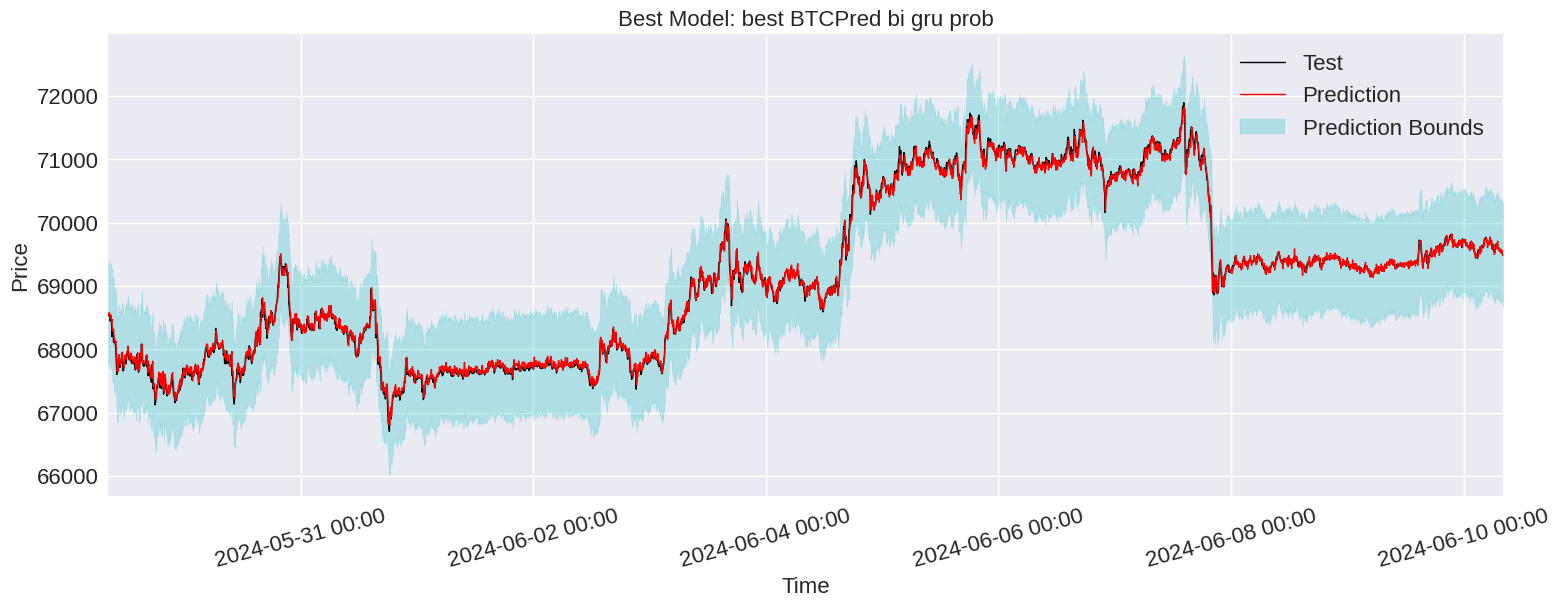

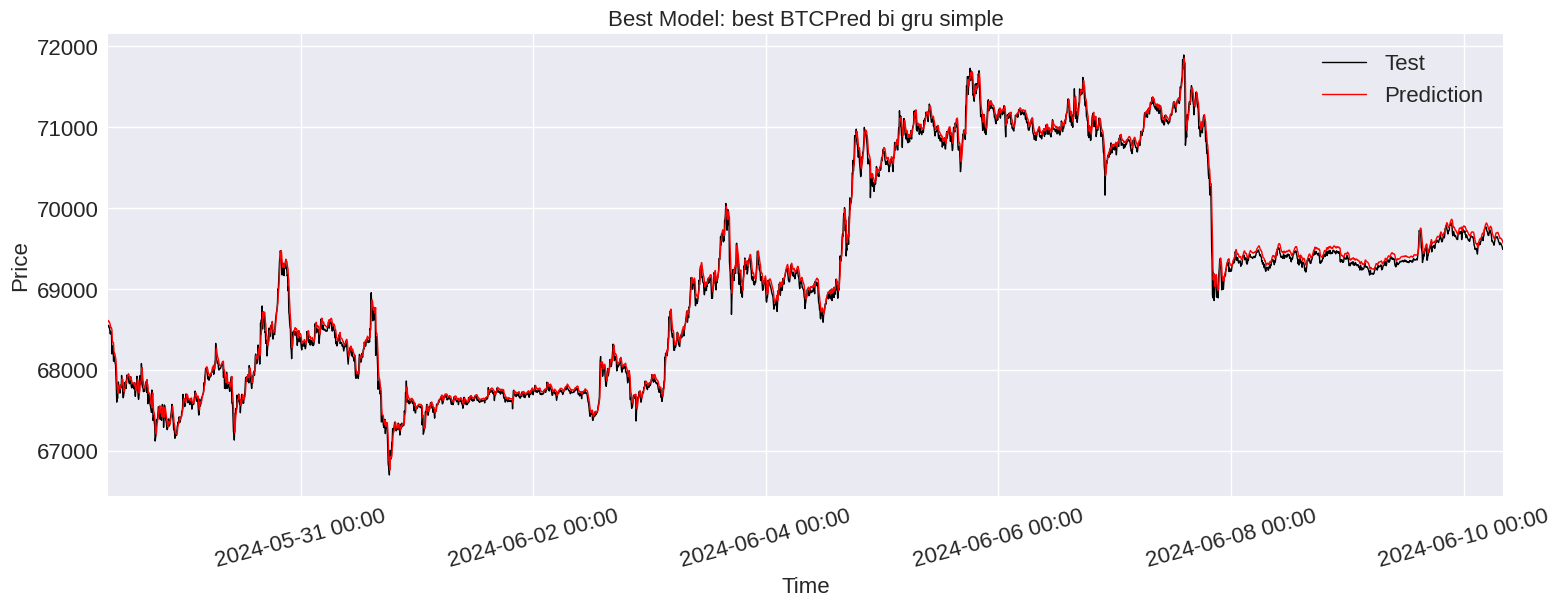

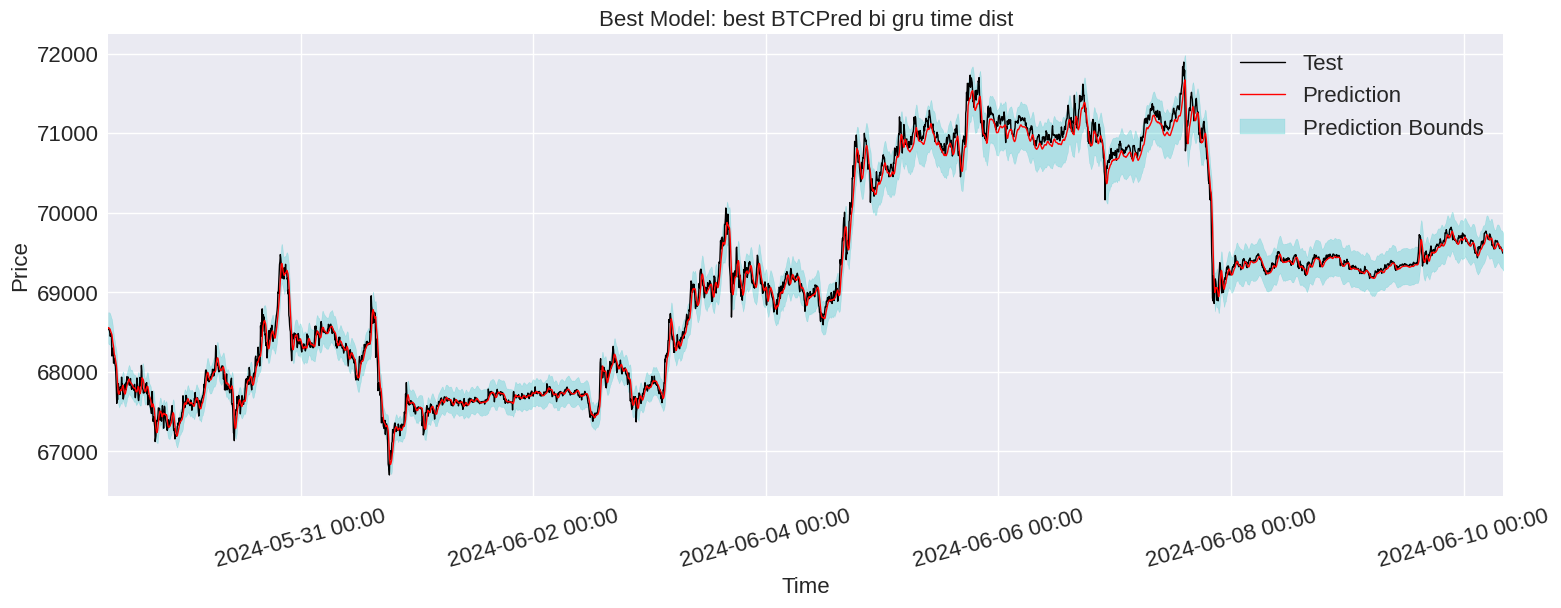

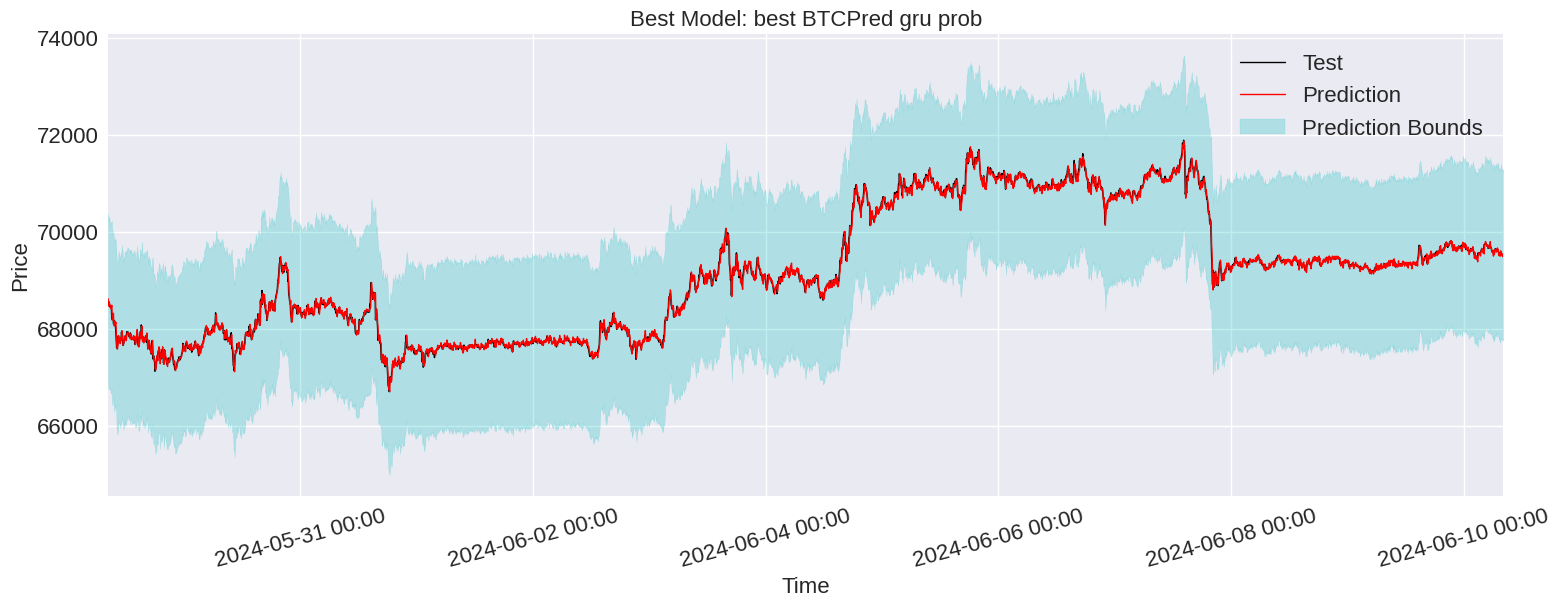

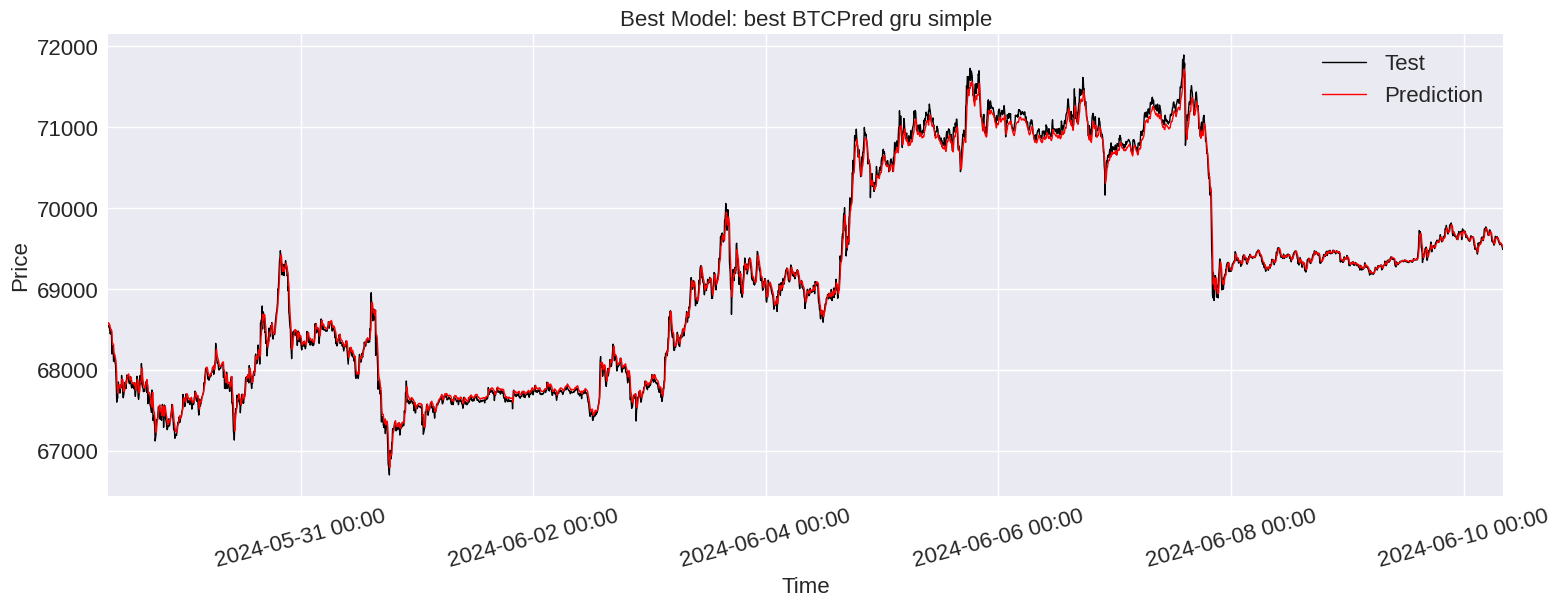

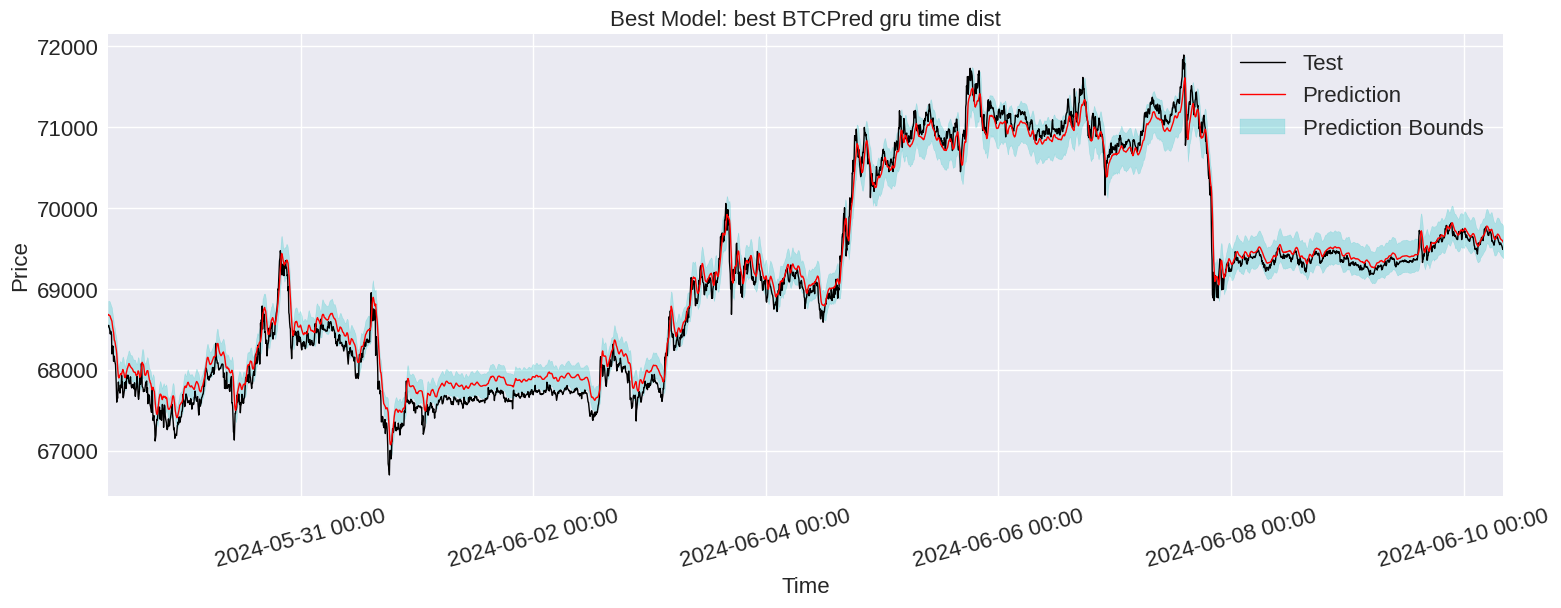

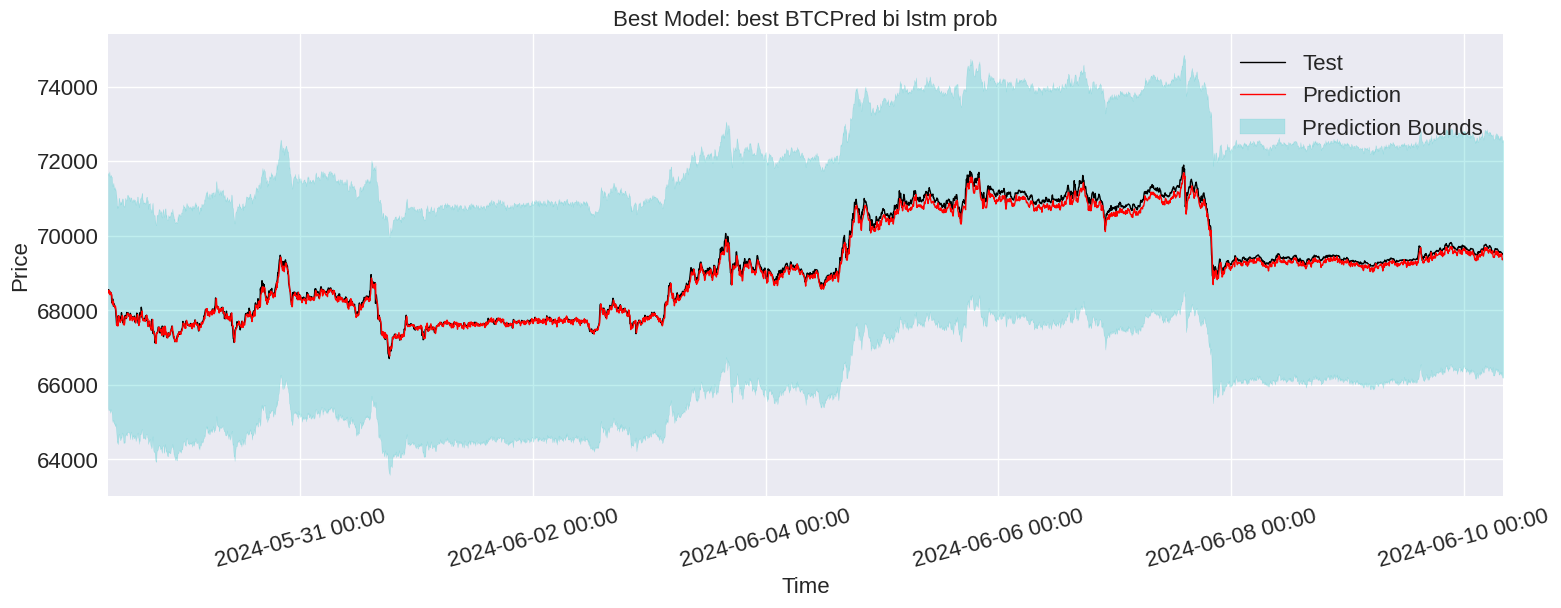

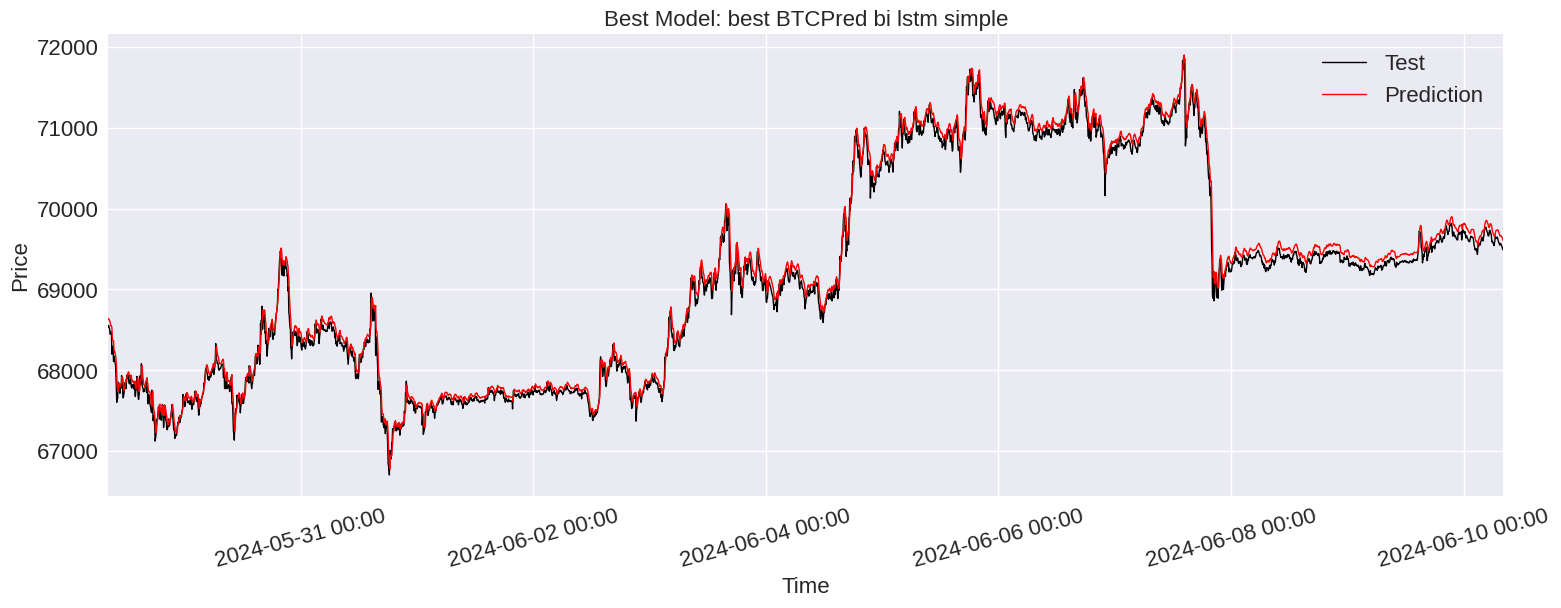

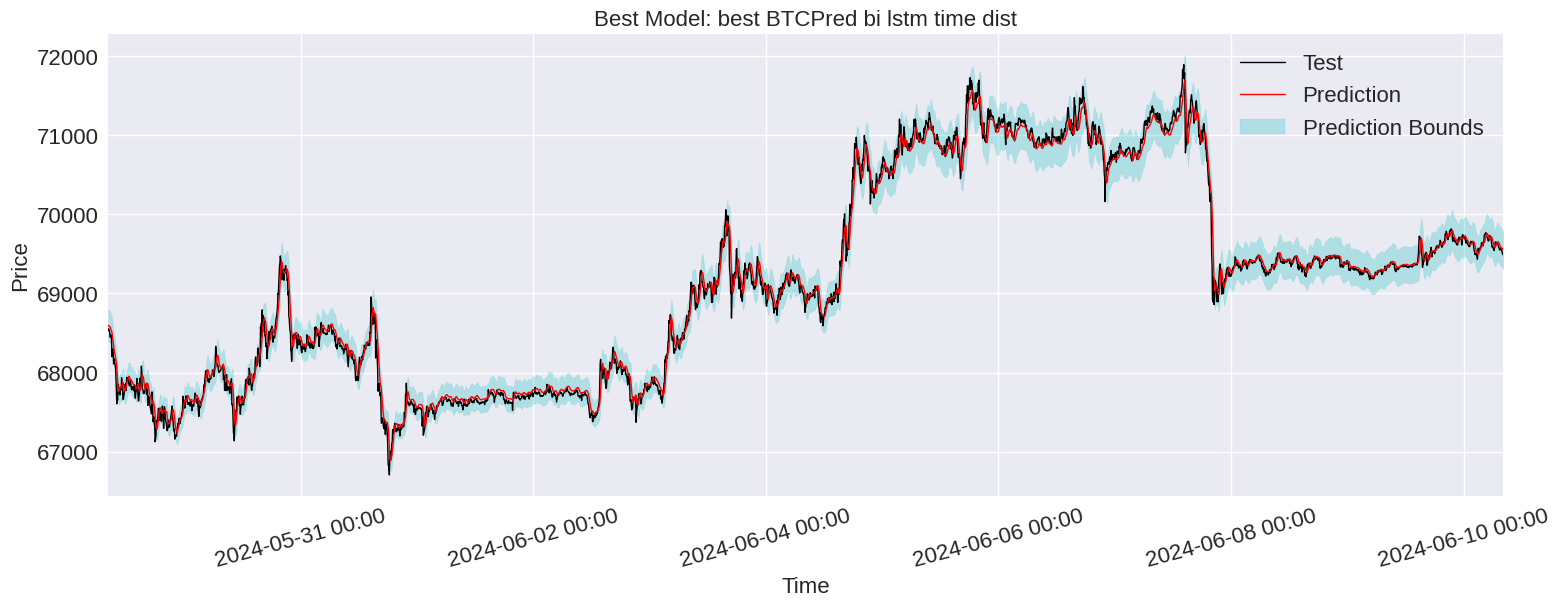

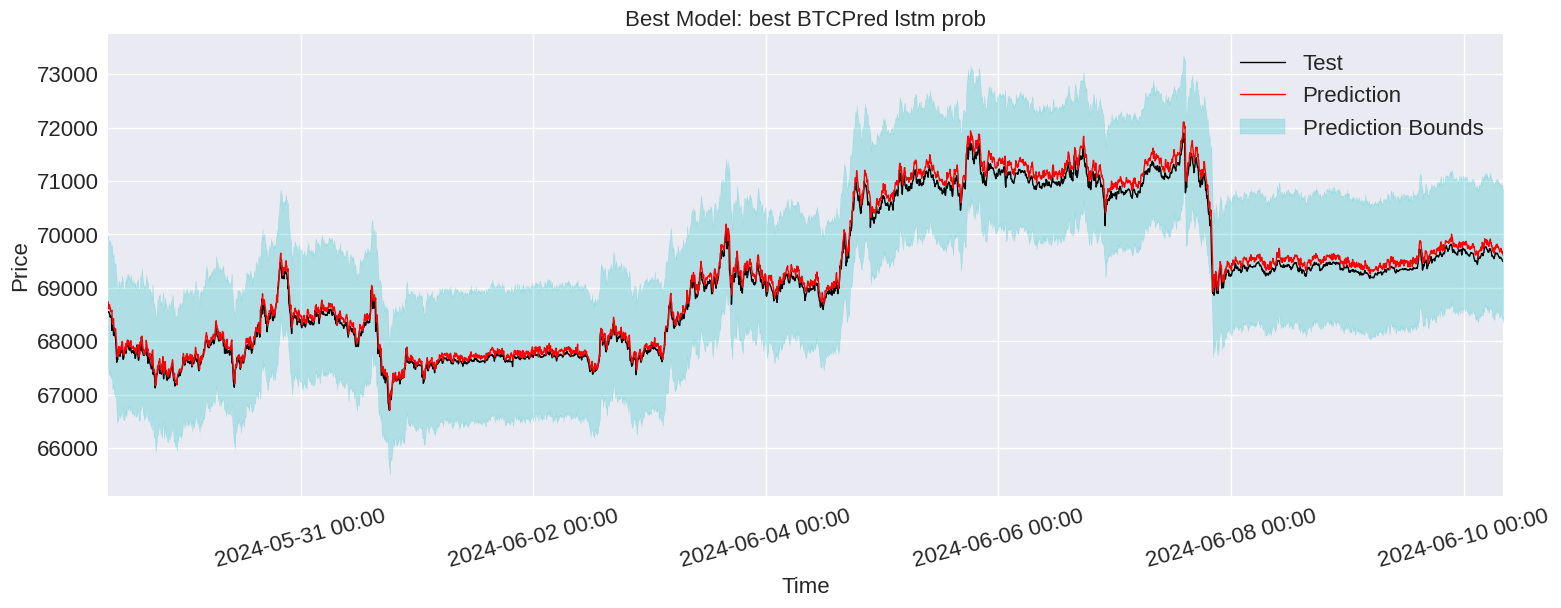

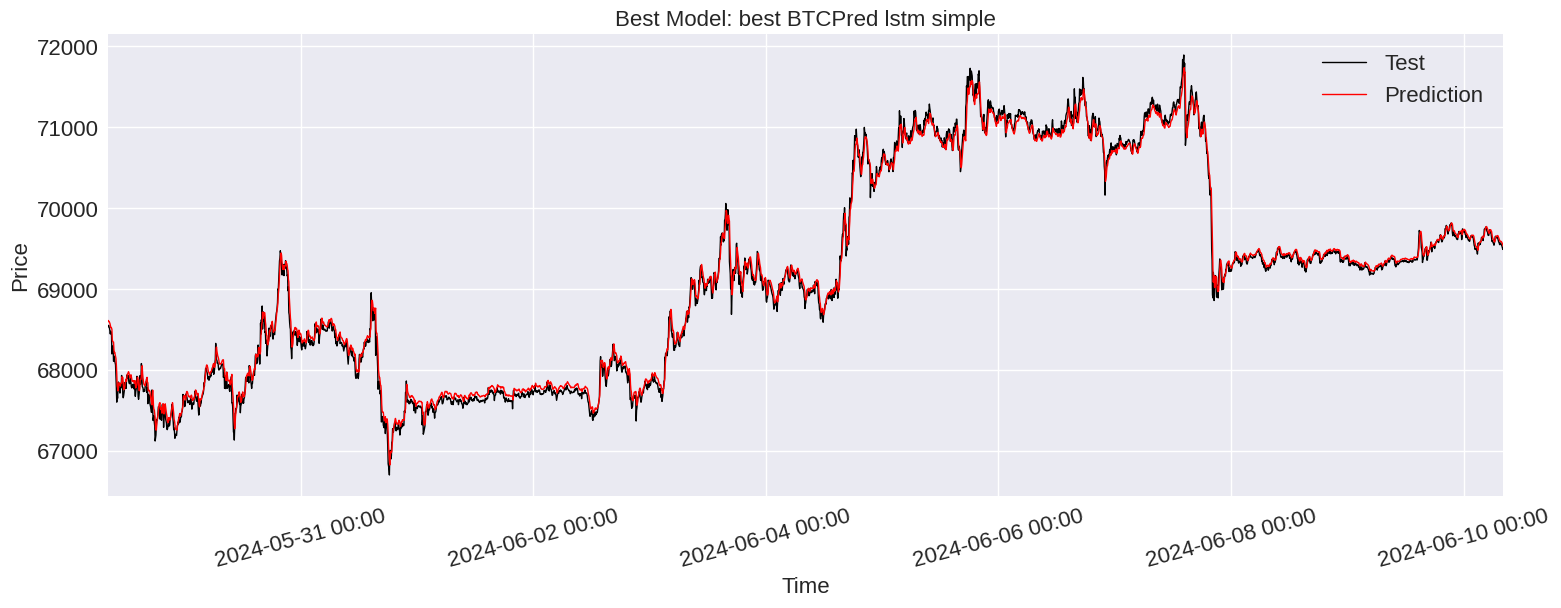

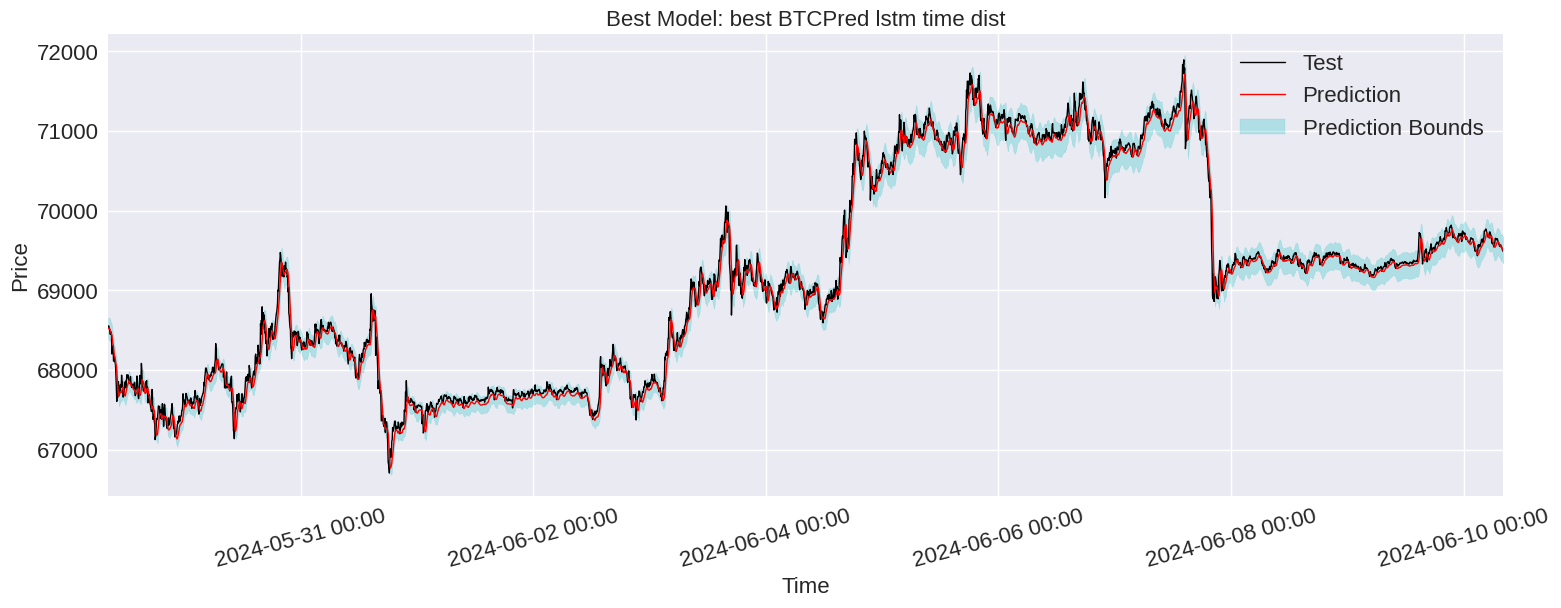

In [ ]:
"""
Description:
- Plots the prediction results for a specific model, including the test set and predicted values.

Parameters:
- y_train (numpy.ndarray): True values for the training set.
- y_test (numpy.ndarray): True values for the test set.
- y_pred (numpy.ndarray): Predicted values for the test set.
- model_name (str): Name of the model for labeling the plot.
- whole_data (bool): If True, includes the entire dataset in the plot (default is False).

Returns:
- None
"""
for model_name in y_pred_best.keys():
    plot_prediction(y_train, y_test, y_pred_best[model_name], model_name = model_name.replace('_', ' '))

# Residuals vs. Predicted Values Visualization

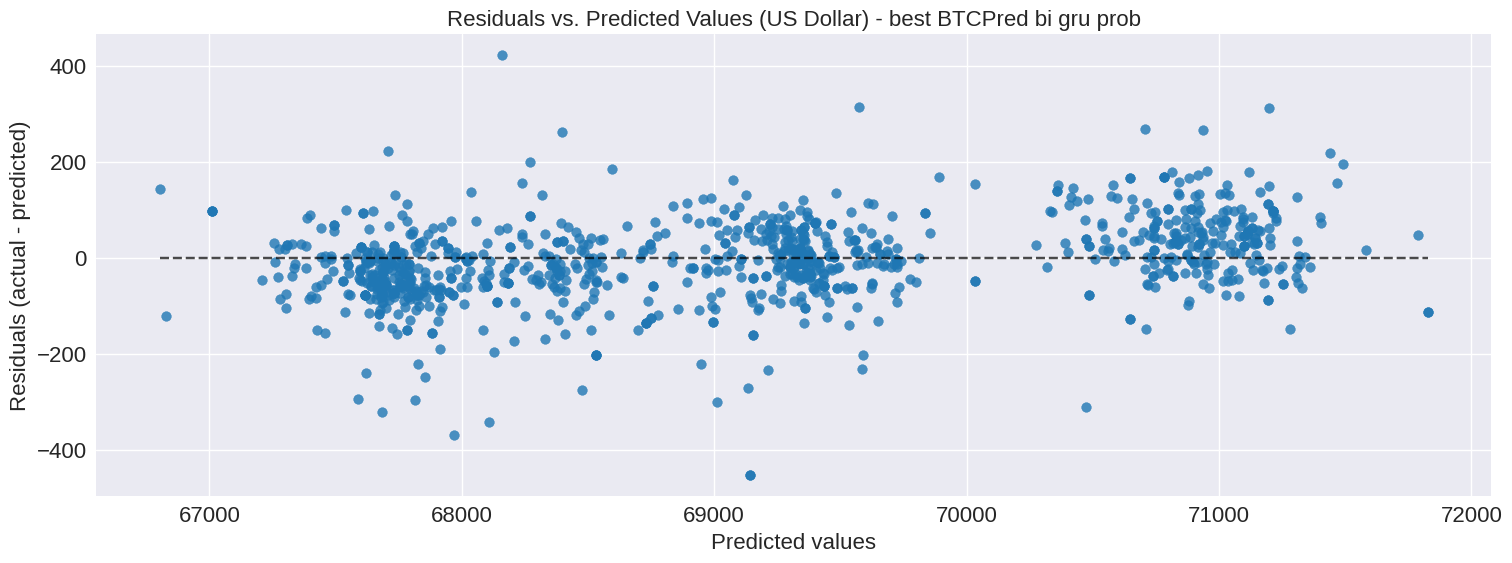

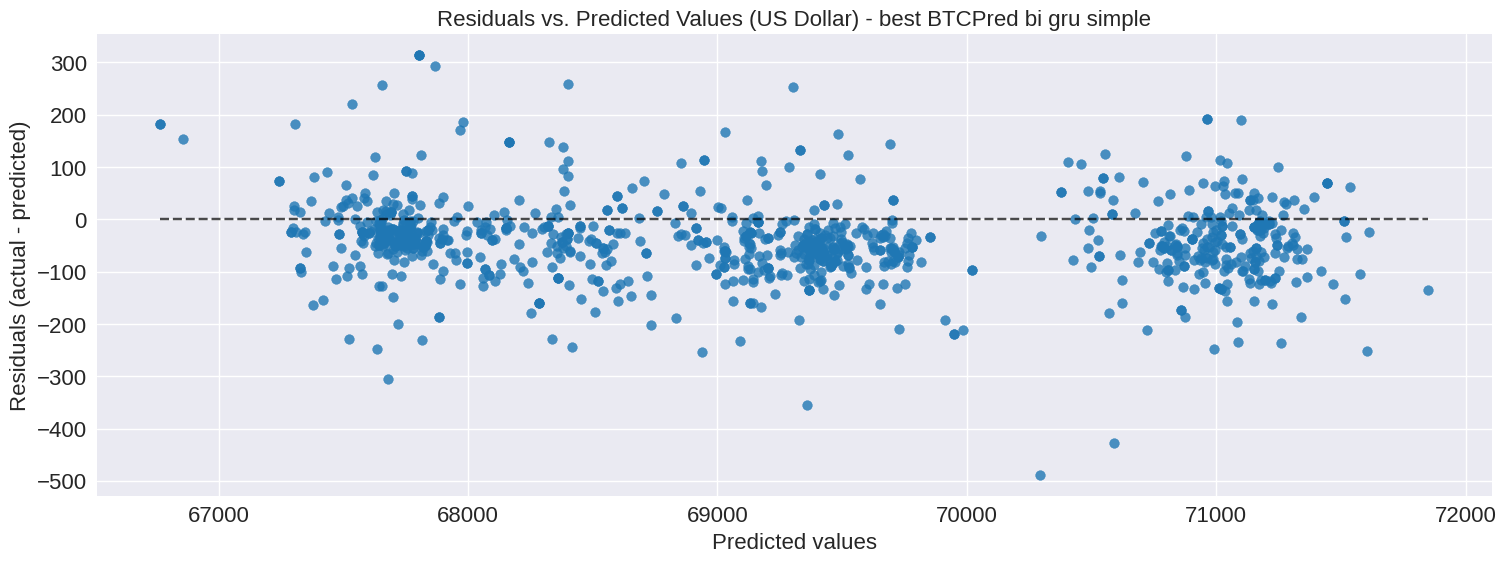

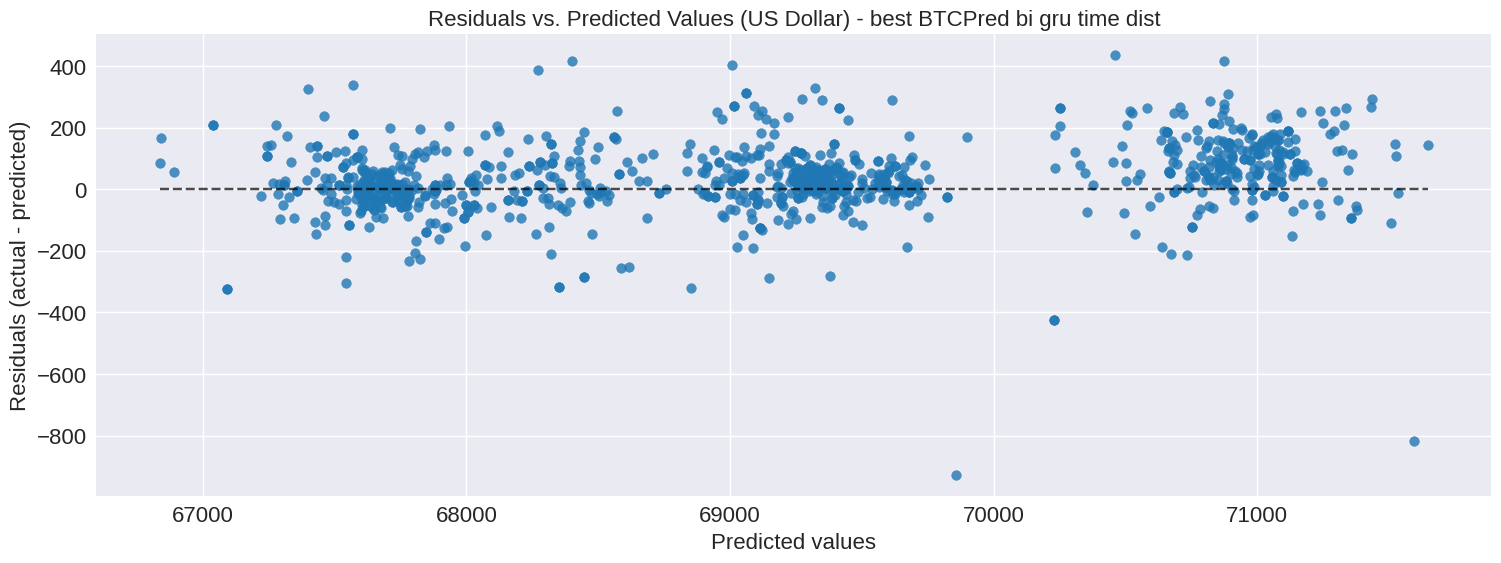

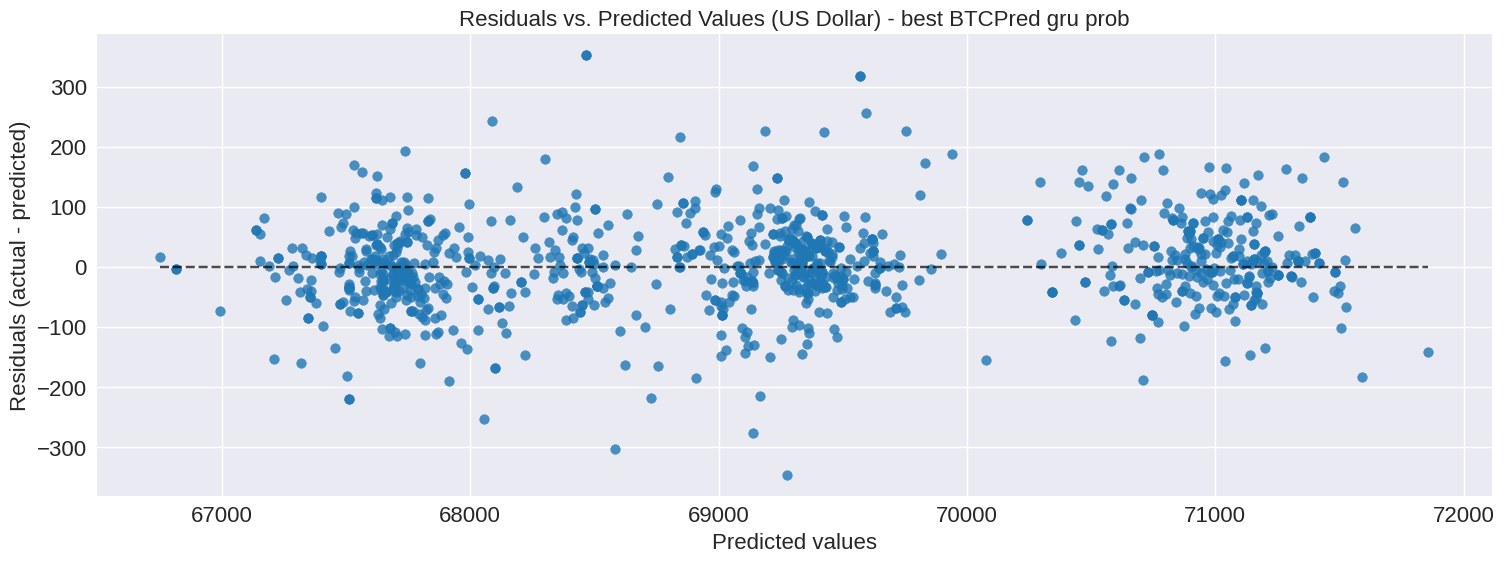

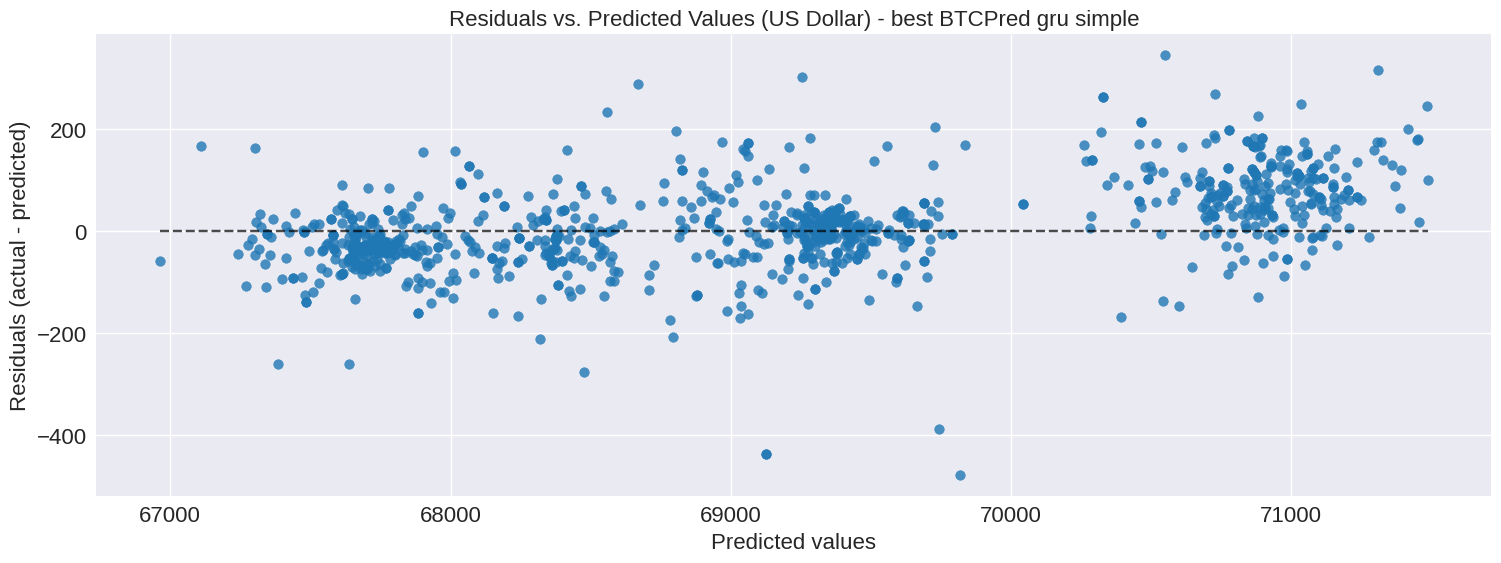

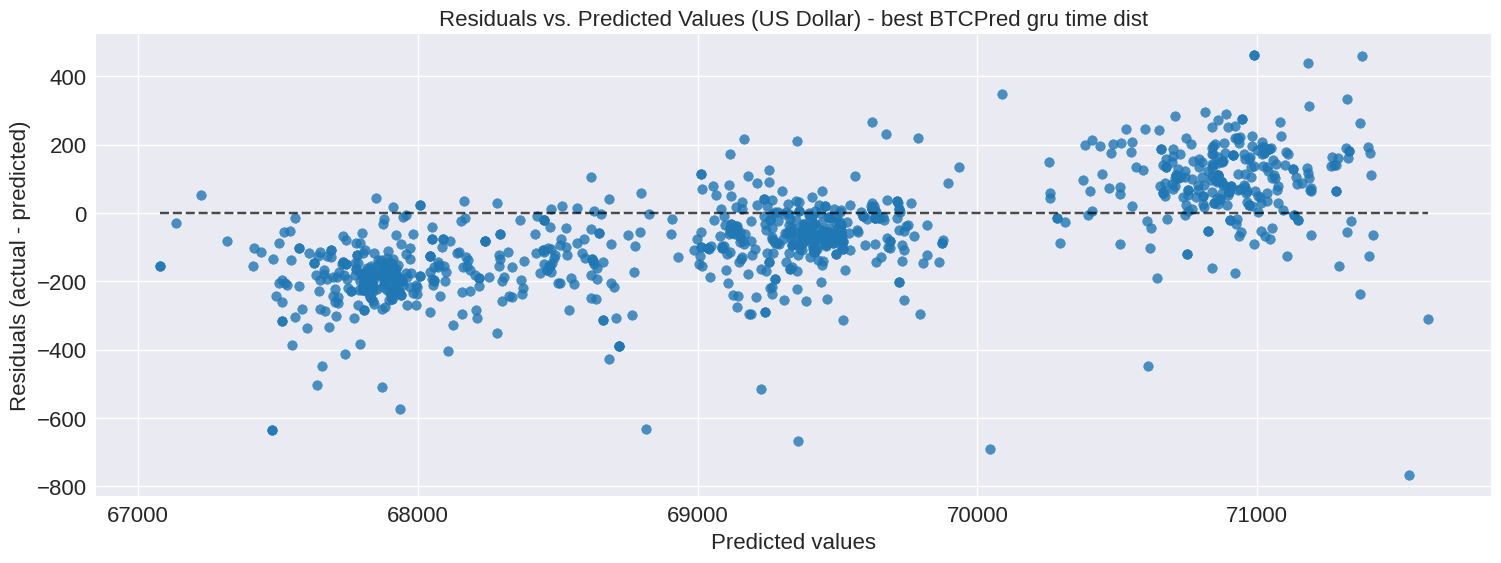

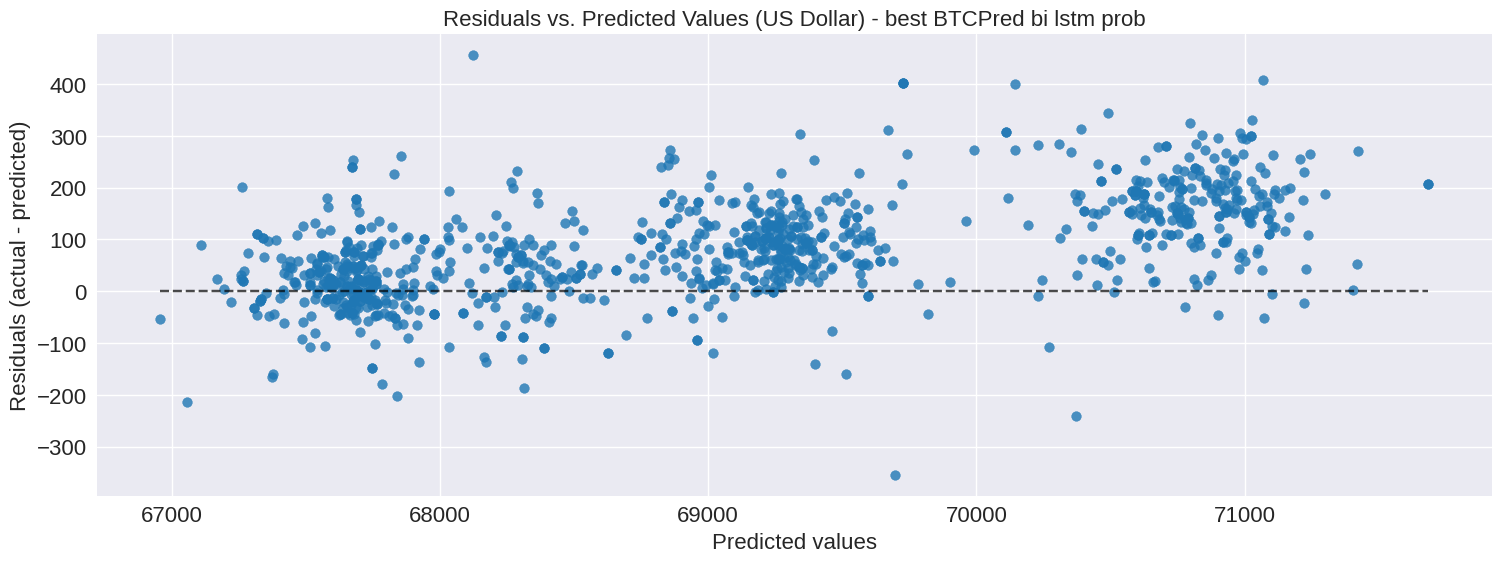

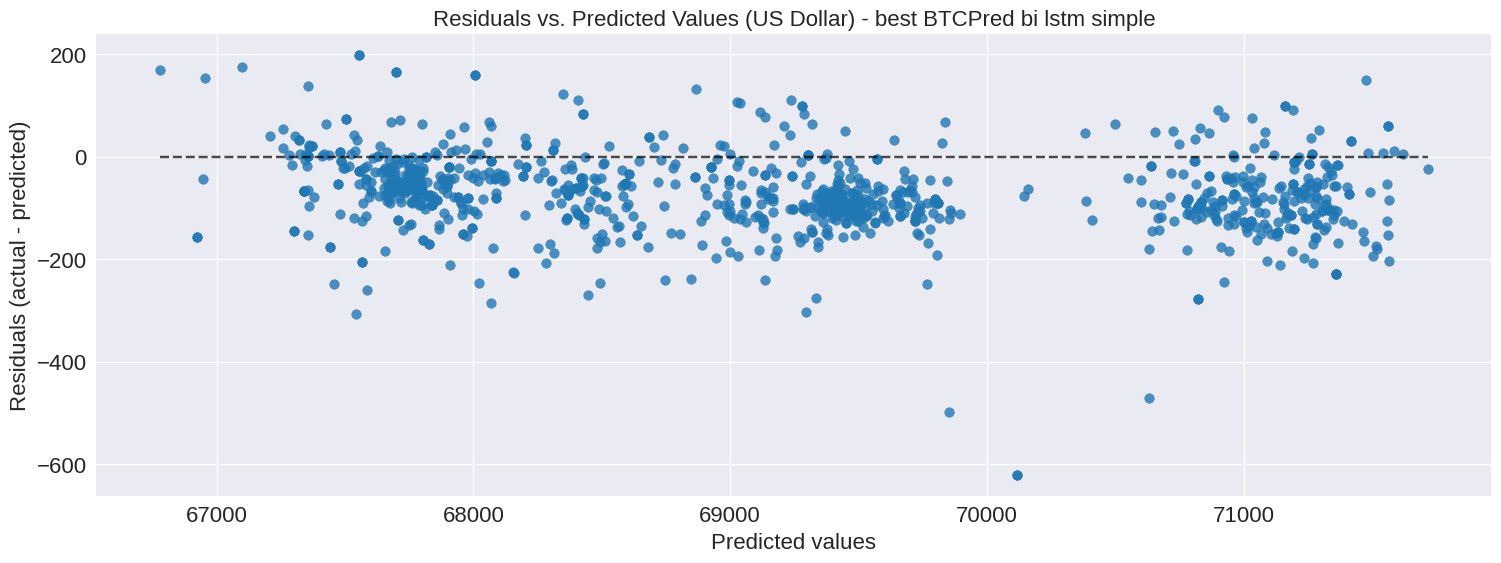

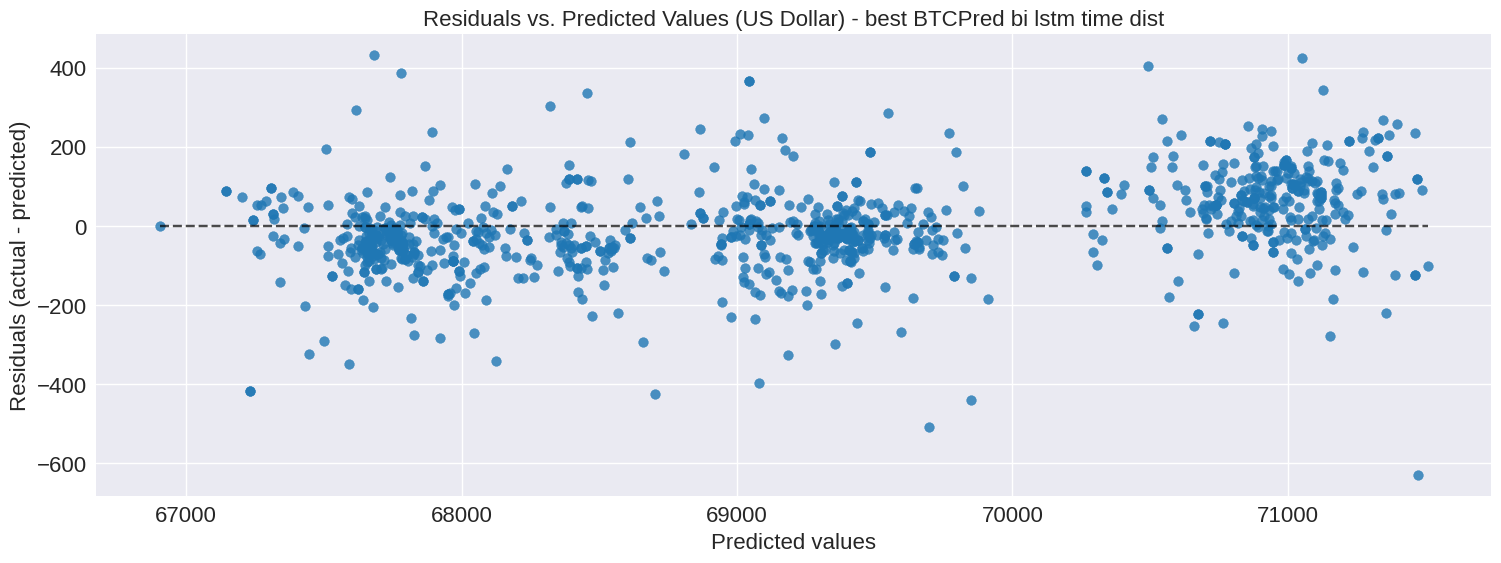

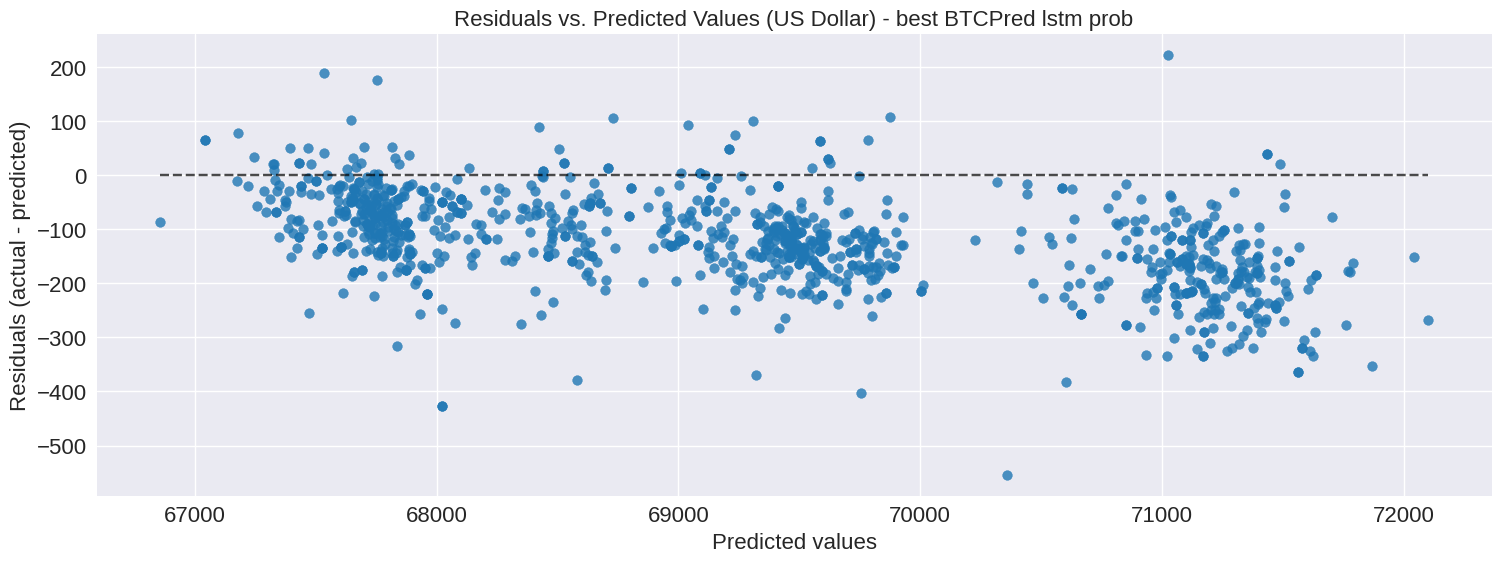

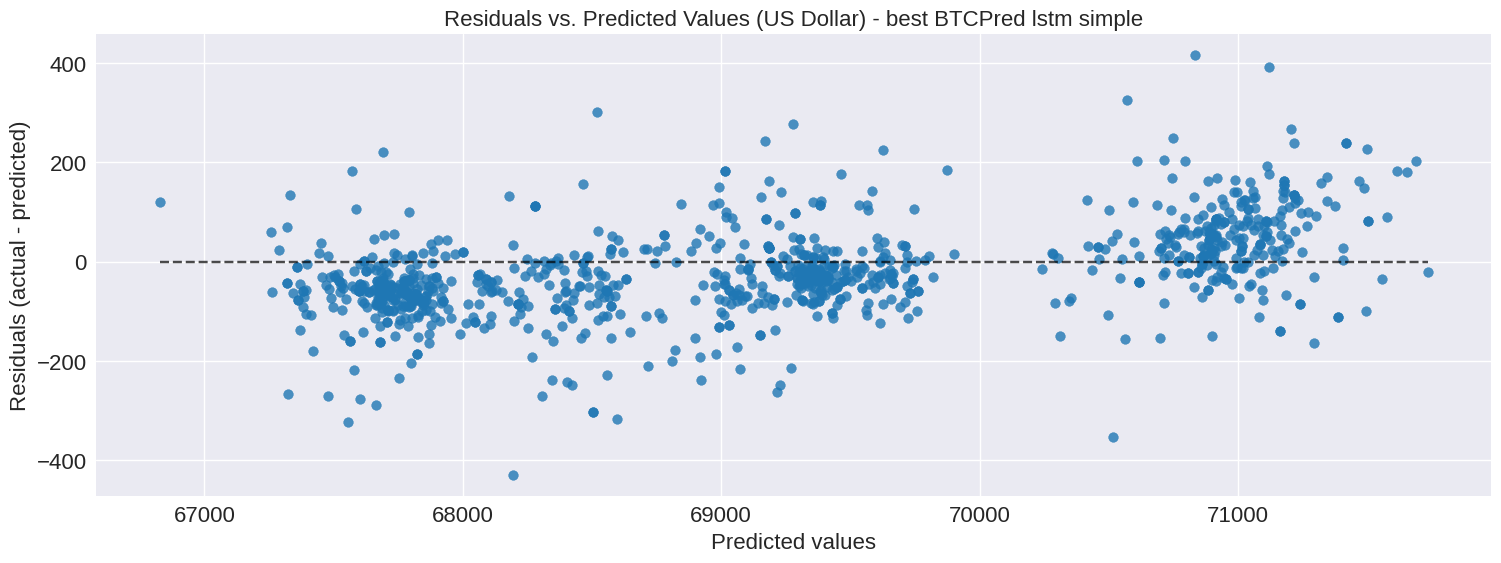

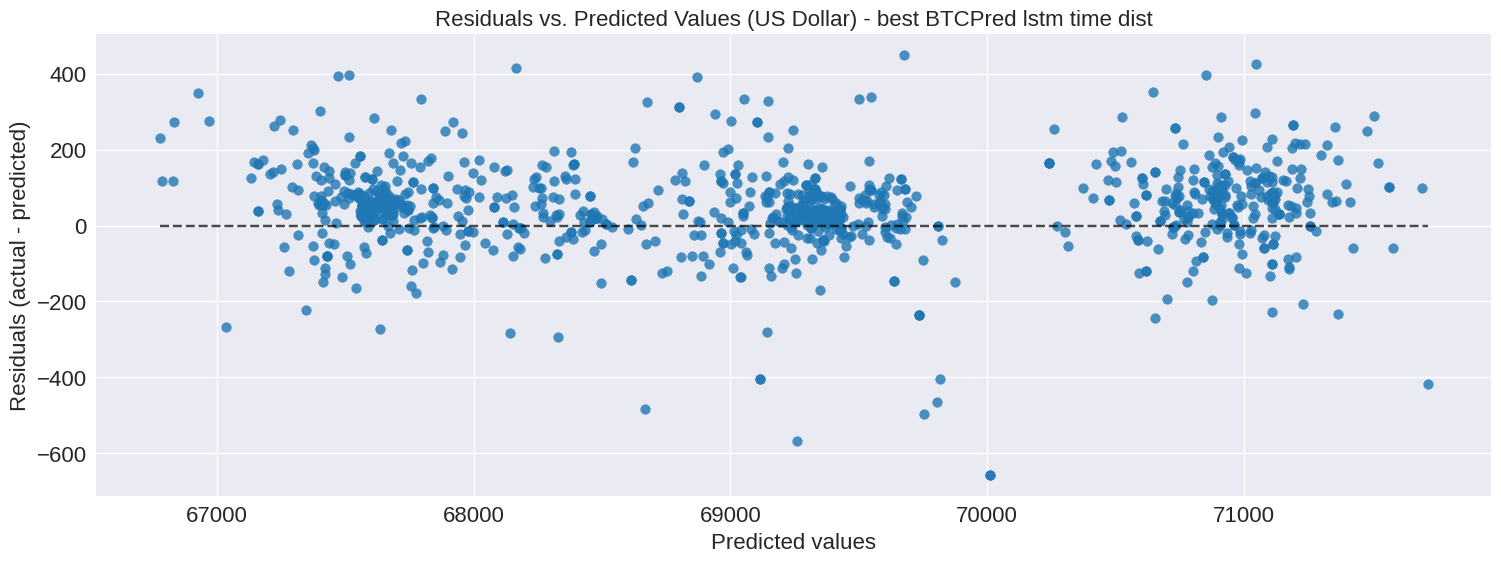

In [ ]:
"""
Description:
- Visualize the relationship between residuals and predicted values for each model.

Parameters:
- y_test (numpy.ndarray): True labels for the test set.
- y_pred_best (dict): Predictions from the best models.
- close_minmax (numpy.ndarray): Min-max values for denormalization.

Visualization:
- Residuals vs. Predicted Values plot displays the difference between true and predicted values against the predicted values.
- Each plot corresponds to a specific model, showcasing the model's performance in predicting price residuals.

Note: Residuals are the differences between the true and predicted values, providing insights into the model's accuracy.
"""
for model_name in y_pred_best.keys():
    PredictionErrorDisplay.from_predictions(y_true = denormalize(y_test, close_minmax),
                                            y_pred = denormalize(y_pred_best[model_name].mean(axis = 1), close_minmax)[:, np.newaxis])
    plt.title(f'Residuals vs. Predicted Values (US Dollar) - {model_name.replace("_", " ")}')
    plt.show()

# Models Evaluation Results

In [ ]:
df = pd.DataFrame.from_dict(models_test_result, orient = 'index')
df

r2_score  mean_absolute_percentage_error  \
best_BTCPred_bi_gru_prob        0.996025                        0.000859   
best_BTCPred_bi_gru_simple      0.995177                        0.000954   
best_BTCPred_bi_gru_time_dist   0.991593                        0.001175   
best_BTCPred_gru_prob           0.996549                        0.000786   
best_BTCPred_gru_simple         0.995420                        0.000879   
best_BTCPred_gru_time_dist      0.982924                        0.001984   
best_BTCPred_bi_lstm_prob       0.990005                        0.001467   
best_BTCPred_bi_lstm_simple     0.992704                        0.001279   
best_BTCPred_bi_lstm_time_dist  0.991897                        0.001172   
best_BTCPred_lstm_prob          0.986425                        0.001840   
best_BTCPred_lstm_simple        0.995009                        0.000974   
best_BTCPred_lstm_time_dist     0.991218                        0.001252   

                                explained_variance_score  \
best_BTCPred_bi_gru_prob                        0.996036   
best_BTCPred_bi_gru_simple                      0.996223   
best_BTCPred_bi_gru_time_dist                   0.992132   
best_BTCPred_gru_prob                           0.996557   
best_BTCPred_gru_simple                         0.995428   
best_BTCPred_gru_time_dist                      0.985517   
best_BTCPred_bi_lstm_prob                       0.994290   
best_BTCPred_bi_lstm_simple                     0.996105   
best_BTCPred_bi_lstm_time_dist                  0.991946   
best_BTCPred_lstm_prob                          0.995314   
best_BTCPred_lstm_simple                        0.995264   
best_BTCPred_lstm_time_dist                     0.992498   

                                mean_squared_log_error  mean_poisson_deviance  \
best_BTCPred_bi_gru_prob                      0.000001               0.095107   
best_BTCPred_bi_gru_simple                    0.000002               0.115616   
best_BTCPred_bi_gru_time_dist                 0.000003               0.200846   
best_BTCPred_gru_prob                         0.000001               0.082833   
best_BTCPred_gru_simple                       0.000002               0.109655   
best_BTCPred_gru_time_dist                    0.000006               0.412401   
best_BTCPred_bi_lstm_prob                     0.000003               0.237536   
best_BTCPred_bi_lstm_simple                   0.000003               0.174566   
best_BTCPred_bi_lstm_time_dist                0.000003               0.194157   
best_BTCPred_lstm_prob                        0.000005               0.322956   
best_BTCPred_lstm_simple                      0.000002               0.119745   
best_BTCPred_lstm_time_dist                   0.000003               0.210528   

                                 max_error  
best_BTCPred_bi_gru_prob        515.937500  
best_BTCPred_bi_gru_simple      784.007812  
best_BTCPred_bi_gru_time_dist   927.273438  
best_BTCPred_gru_prob           533.585938  
best_BTCPred_gru_simple         657.710938  
best_BTCPred_gru_time_dist      984.117188  
best_BTCPred_bi_lstm_prob       552.015625  
best_BTCPred_bi_lstm_simple     834.710938  
best_BTCPred_bi_lstm_time_dist  963.867188  
best_BTCPred_lstm_prob          811.375000  
best_BTCPred_lstm_simple        674.750000  
best_BTCPred_lstm_time_dist     935.781250

# Download TRX-USD Price Data

In [ ]:
"""
Description:
- Downloads historical price data for TRX-USD cryptocurrency using the Yahoo Finance API.
- Adjusts the timezone, date format, and ticker symbol for specific requirements.

Parameters:
- timezone (pytz.timezone): Timezone information for data timestamp adjustment.
- date_format (str): Format for representing dates.
- tickers (str): Ticker symbol for the cryptocurrency pair.

Returns:
- pandas.DataFrame: Historical price data for TRX-USD.
"""
data = download_price_data(timezone = iran_timezone, date_format = dateformat, tickers = 'TRX-USD')

[*********************100%%**********************]  1 of 1 completed

Downloaded from 2024-04-11 10:05 to 2024-06-10 08:05 with total 17257 samples


In [ ]:
data

Open      High       Low     Close  AdjClose   Volume
Datetime                                                                   
2024-04-11 10:05  0.120100  0.120105  0.120094  0.120099  0.120099        0
2024-04-11 10:10  0.120078  0.120078  0.120045  0.120045  0.120045        0
2024-04-11 10:15  0.120049  0.120113  0.120042  0.120113  0.120113   104000
2024-04-11 10:20  0.120124  0.120129  0.120106  0.120106  0.120106   738048
2024-04-11 10:25  0.120054  0.120117  0.120054  0.120113  0.120113   157184
...                    ...       ...       ...       ...       ...      ...
2024-06-10 07:45  0.117533  0.117537  0.117532  0.117537  0.117537   500800
2024-06-10 07:50  0.117535  0.117535  0.117513  0.117516  0.117516   202112
2024-06-10 07:55  0.117516  0.117516  0.116900  0.116900  0.116900   272608
2024-06-10 08:00  0.116773  0.116811  0.116286  0.116294  0.116294  3341632
2024-06-10 08:05  0.116298  0.116306  0.116284  0.116284  0.116284  2202368

[17257 rows x 6 columns]

# Plot Downloaded TRX Price Data

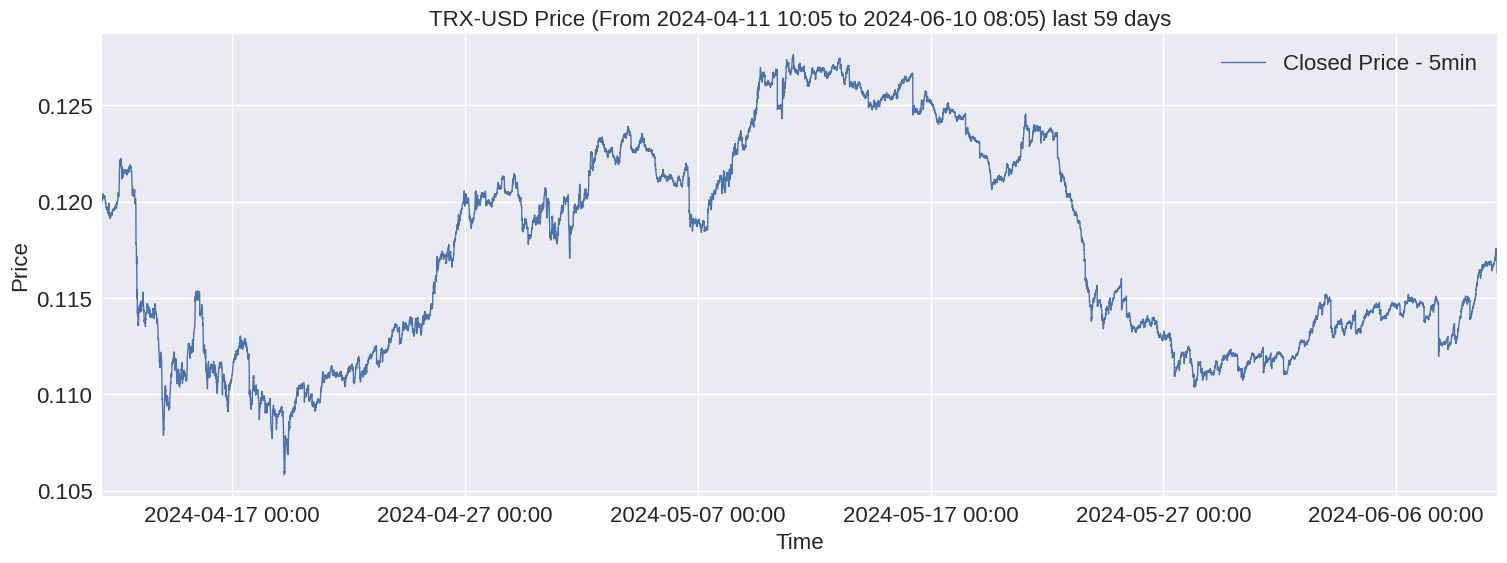

In [ ]:
"""
Description:
- Plots the historical closed price of a cryptocurrency.
- The x-axis is formatted with a custom date formatter.

Parameters:
- data (pd.DataFrame): Historical price data with timestamps and closed prices.
- dateformat (str): Custom date format for timestamp display.
"""
dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index]

plt.gca().xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
plt.plot(dates, list(data['Close']), label = 'Closed Price - 5min', linewidth = 1)
plt.xlim([dates[0], dates[-1]])
plt.title('TRX-USD Price (From {} to {}) last {} days'
.format(data.index[0], data.index[-1], (datetime.strptime(data.index[-1], dateformat) - datetime.strptime(data.index[0], dateformat)).days))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model Training Configuration

In [ ]:
"""
Description:
- Configuration settings for training the time series prediction models.

Parameters:
- test_split_percentage (float): Percentage of data reserved for testing.
- validation_split_percentage (float): Percentage of training data used for validation.
- epochs (int): Number of training epochs.
- batch_size (int): Batch size for training.
- verbose (int): Verbosity level during training (0 for silent).
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
test_split_percentage = .8
validation_split_percentage = .2
epochs = 10
batch_size = 32
verbose = 0
analysis_duration = 6
price_pairs = 'TRXUSD'

# Price Preprocessing and Normalization Parameters

In [ ]:
"""
Parameters for normalizing cryptocurrency closing prices:
- alpha (float): Scaling factor for the minimum value.
- beta (float): Scaling factor for the maximum value.
- close_price (numpy.ndarray): NumPy array containing closing prices.
- data_len (int): Total length of the price data.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
"""
alpha, beta = .8, 1.2
close_price = pd.Series.to_numpy(data['Close'])
data_len = close_price.shape[0]
train_len = int((test_split_percentage * data_len) // analysis_duration * analysis_duration)
test_len = int(data_len - train_len)
close_minmax = np.array([alpha * close_price.min(), beta * close_price.max()], dtype = 'float32')

# Price Normalization and Save

In [ ]:
"""
Description:
- Normalize the closing prices of cryptocurrency data and save the min-max normalization range.

Parameters:
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- data_len (int): Total length of the price data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
close_price = close_price.reshape((data_len, 1)).astype('float32')
close_price = normalize(close_price, close_minmax)
np.save(f'close_minmax_{price_pairs.lower()}.npy', close_minmax)

# Data Splitting for Training and Validation

In [ ]:
"""
Description:
- Split the time series data into training, testing, and validation sets for model training.

Parameters:
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and testing data split.
- X_val, y_val (numpy.ndarray): Validation data split from the training set.
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- validation_split_percentage (float): Percentage of training data used for validation.
- analyzing_duration (int): Duration of the sequence used for prediction.
"""
X_train, y_train, X_test, y_test = split_data(close_price = close_price, training_len = train_len, testing_len = test_len, analyzing_duration = analysis_duration)
X_val, y_val = X_train[int(train_len - (validation_split_percentage * train_len)):], y_train[int(train_len - (validation_split_percentage * train_len)):]
X_train, y_train = X_train[:int(train_len - (validation_split_percentage * train_len))], y_train[:int(train_len - (validation_split_percentage * train_len))]

# Transfer Learning with Probabilistic GRU Model (train on TRX price data)

In [ ]:
"""
Description:
- Performs transfer learning by loading a pre-trained Probabilistic GRU model.
- Transfer learning is a machine learning technique where knowledge gained from one model (source model) is applied to another related model (target model).
- In this code, transfer learning is implemented for time series forecasting using a pre-trained Probabilistic GRU model.
- The source model, 'best_BTCPred_gru_prob,' is trained on Bitcoin price data.
- The target model, 'best_TRXPred_gru_prob,' is trained on Tron price data using the weights transferred from the source model.
- This approach leverages the learned patterns and features from the Bitcoin data to enhance the training of the Tron model.
- The transfer_model() function loads the pre-trained model, freezes the layers up to the output layer, and compiles it for training.
- The model is then trained on Tron data, and the performance is evaluated and recorded in transfer_model_test_result.
- Various metrics such as R2 score, mean absolute percentage error, explained variance score, etc., are used to assess the model's performance.


Parameters:
- K.clear_session(): Clears the Keras session to release resources.
- m_name_ (str): Model name for identification.
- transfer_model_test_result (dict): Dictionary to store evaluation results.
- model (tf.keras.Model): Transfer learning model loaded from a pre-trained model.
- out_path_best (str): Path to store the best model during training.
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and test data.
- epochs, batch_size, verbose (int): Training parameters.
- close_minmax (numpy.ndarray): Min-max values for denormalization.

Returns:
- None: The transfer learning model is trained, evaluated, and results are recorded in transfer_model_test_result.
"""
K.clear_session()
m_name_ = 'best_TRXPred_gru_prob'
transfer_model_test_result = {}
transfer_model_test_result.update({f'{m_name_}': {}})
model = transfer_model()
model.summary(line_length = 140)

tbcall = TrainingCallback(model_dir = out_path_best,
                          valid_data = (X_val, y_val),
                          model = model, model_name = m_name_)

model_history = model.fit(X_train, y_train,
                          epochs = epochs, batch_size = batch_size, callbacks = tbcall, verbose = verbose)

model.save(f'{out_path}/{m_name_.replace("best", "fulltrained")}.keras')
best_model = load_model(f'{out_path_best}/{m_name_}.keras', safe_mode = False)

test_p = model.predict(X_test)
test_p_best = best_model.predict(X_test)
y_pred_best.update({f'{m_name_}': test_p_best})

transfer_model_test_result[f'{m_name_}'].update({'r2_score': float(r2_score(denormalize(y_test, close_minmax),
                                                                            denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_absolute_percentage_error': float(mape(denormalize(y_test, close_minmax),
                                                                                              denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'explained_variance_score': float(evs(denormalize(y_test, close_minmax),
                                                                                       denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_squared_log_error': float(msle(denormalize(y_test, close_minmax),
                                                                                      denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_poisson_deviance': float(mpd(denormalize(y_test, close_minmax),
                                                                                    denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'max_error': float(max_error(denormalize(y_test, close_minmax),
                                                                              denormalize(test_p_best.mean(axis = 1), close_minmax)))})

Model: "best_TRXPred_gru_prob"
____________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              
 close_price (InputLayer)                                      [(None, 6, 1)]                                          0                    
                                                                                                                                            
 gru (GRU)                                                     (None, 256)                                             198912               
                                                                                                                                            
 batch_normalization (BatchNormalization)                      (None, 256)                                             1024

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 3ms/step


Epoch: 01/10 | 0:00:04 | Price R2 score: 0.9948 | loss: 4.8787 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 02/10 | 0:00:01 | Price R2 score: 0.9995 | loss: 1.4484 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 3ms/step
Epoch: 03/10 | 0:00:01 | Price R2 score: 0.9979 | loss: 1.5453 | Model Weights Not Changed
87/87 [==============================] - 0s 3ms/step
Epoch: 04/10 | 0:00:01 | Price R2 score: 0.9995 | loss: 1.3805 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 05/10 | 0:00:01 | Price R2 score: 0.9982 | loss: 1.3247 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 06/10 | 0:00:01 | Price R2 score: 0.9981 | loss: 1.5628 | Model Weights Not Changed
87/87 [==============================] - 0s 2ms/step
Epoch: 07/10 | 0:00:01 | Price R2 score: 0.9993 | loss: 1.6301 | Model Weights Not Changed
87/87 [====

# Prediction visualization

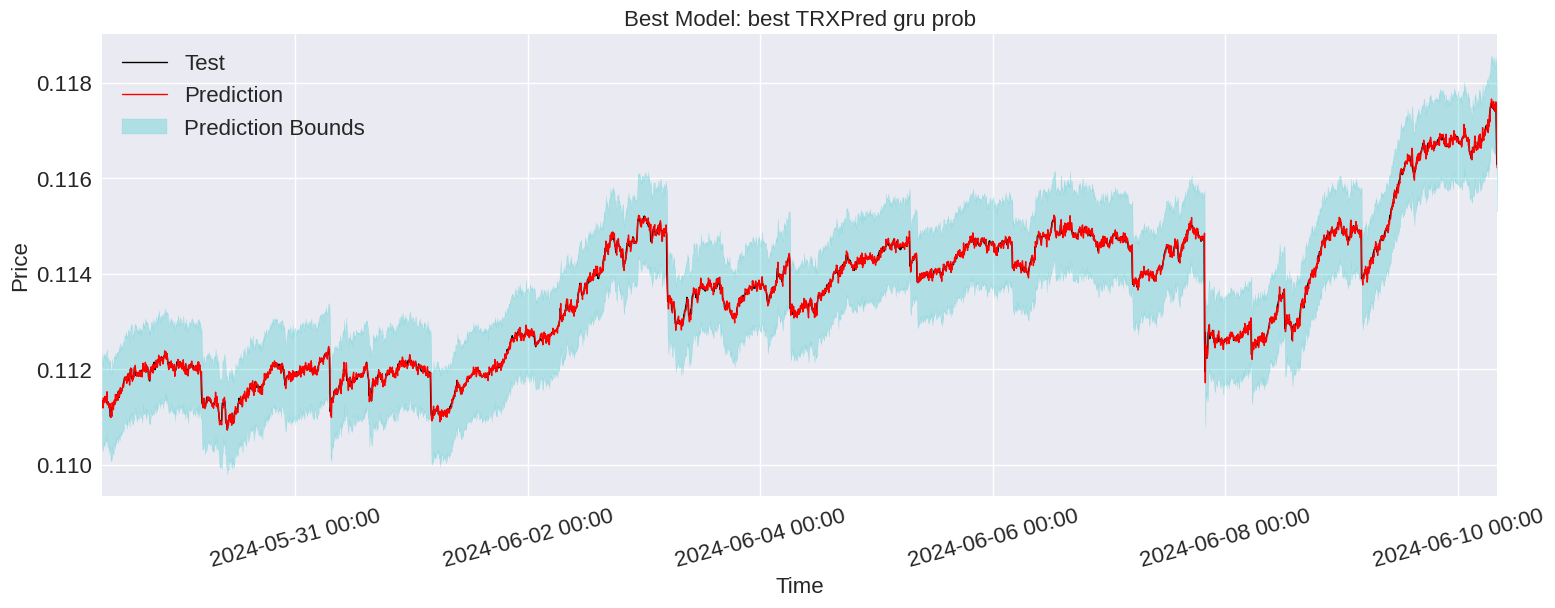

In [ ]:
plot_prediction(y_train, y_test, y_pred_best[m_name_], model_name = m_name_.replace('_', ' '))

# Residuals vs. Predicted Values Visualization

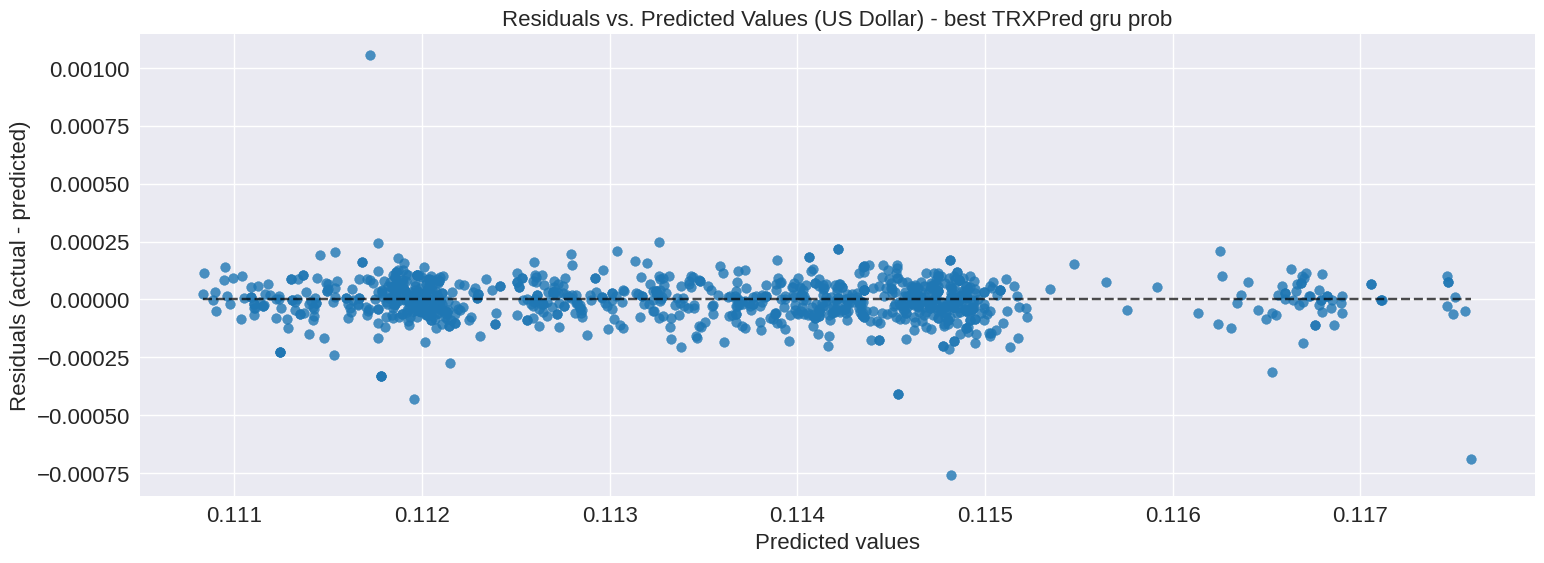

In [ ]:
PredictionErrorDisplay.from_predictions(y_true = denormalize(y_test, close_minmax),
                                        y_pred = denormalize(y_pred_best[m_name_].mean(axis = 1), close_minmax)[:, np.newaxis])
plt.title(f'Residuals vs. Predicted Values (US Dollar) - {m_name_.replace("_", " ")}')
plt.show()

# Models Evaluation Results

In [ ]:
df = pd.DataFrame.from_dict(transfer_model_test_result, orient = 'index')
df

r2_score  mean_absolute_percentage_error  \
best_TRXPred_gru_prob  0.995594                        0.000557   

                       explained_variance_score  mean_squared_log_error  \
best_TRXPred_gru_prob                  0.995595            7.687925e-09   

                       mean_poisson_deviance  max_error  
best_TRXPred_gru_prob           8.396290e-08   0.002222